<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 0 Installment Extra Packages***

#####***Install Some Packages***

In [3]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####***Import Basic Modules***

In [4]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf
from scipy import stats

#***PART I Intro***

###***Chapter 1 Intro [eng](https://www.youtube.com/watch?v=CmorAWRsCAw&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=2)***

####***Section 1 Python Data Science Ecosystem***



<img src="https://yqintl.alicdn.com/f5fb28c5dd4c1571db53528b6ad21fe707fe7b8d.png">

Sorce [Mars – Matrix-based Universal Distributed Computing Framework](https://www.alibabacloud.com/blog/mars-matrix-based-universal-distributed-computing-framework_594606)

####***Section 2 Numpy vs Pandas [eng](https://www.youtube.com/watch?v=e60ItwlZTKM)***

$$\begin{array}{ll}
\text{Numpy}&\text{Pandas}\\\hline
\approx\text{Matrix}&\approx\text{Excel Sheet}\\
\text{Low-Level Data Structure (Numpy Array)}&\text{High-Level Data Structure (Pandas DataFrame)}\\
\text{One Data Type}&\text{One Data Type for Each Column}\\
\end{array}$$

####***Section 3 Four Important Objects***

#####***Series [doc](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)***

In [ ]:
def main():
    temperature = [32, 35, 28]
    day = ['1/1/2017', '1/2/2017', '1/3/2017']

    df = pd.Series(temperature, name="temperature", index=day)

    print(type(df),end="\n\n")
    print(df)
    
if __name__ == "__main__":
    main()

<class 'pandas.core.series.Series'>

1/1/2017    32
1/2/2017    35
1/3/2017    28
Name: temperature, dtype: int64


#####***DataFrame [eng](https://www.youtube.com/watch?v=F6kmIpWWEdU)***

In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']

    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}
    df = pd.DataFrame(data)

    print(type(df),end="\n\n")
    print(df)
    
if __name__ == "__main__":
    main()

<class 'pandas.core.frame.DataFrame'>

        day  temperature  windspeed  event
0  1/1/2017           32          6   Rain
1  1/2/2017           35          7  Sunny
2  1/3/2017           28          2   Snow


#####***Index***

In [ ]:
def main():
    data = [32, 35, 28]
    index = ['1/1/2017', '1/2/2017', '1/3/2017']
    df = pd.Series(data, index=index)
    print(df.index)
    
if __name__ == "__main__":
    main()

Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object')


In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']

    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}
    df = pd.DataFrame(data)
    df.set_index('day', inplace=True) 
    print(df.index)
    
if __name__ == "__main__":
    main()

Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object', name='day')


#####***Columns***

In [ ]:
def main():
    data = [32, 35, 28]
    index = ['1/1/2017', '1/2/2017', '1/3/2017']
    df = pd.Series(data, index=index)
    try:
        print(df.columns)
    except AttributeError as e:
        print(e)
    
if __name__ == "__main__":
    main()

'Series' object has no attribute 'columns'


In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']

    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}
    df = pd.DataFrame(data)
    print(df.columns)
    
if __name__ == "__main__":
    main()

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')


#***PART II Series***



###***Chapter 2 Series***

####***Section 1 What is Pandas Series***

#####***Pandas Series***

$$\begin{array}{lll}
\text{2D Numpy Array}&\text{Matrix-like data structure}\\
&\text{2D Numpy Array has a particular dtype}\\
\text{DataFrame}&\text{Excel-like data structure}\\
&\text{Each column may have different dtype}\\
\text{Series}&\text{One column of Excel-like data structure}\\
&\text{Series has a particular dtype}\\
\end{array}$$

<img src="https://media.geeksforgeeks.org/wp-content/uploads/dataSER-1.png">

Sorce [Python | Pandas Series](https://www.geeksforgeeks.org/python-pandas-series/)

####***Section 2 How to make Pandas Series***

#####***Series from DataFrame***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) # dataframe
    print(df.head(3),end="\n\n\n\n\n\n")

    # Series from DataFrame
    dg = df["Survived"] # <--- same as below # pandas series
    print(dg.head(3))

if __name__ == "__main__":
    main()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  





0    0
1    1
2    1
Name: Survived, dtype: int64


In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) # dataframe
    print(df.head(3),end="\n\n\n\n\n\n")

    # Series from DataFrame
    dg = df.Survived # <--- same as above # pandas series
    print(dg.head(3))

if __name__ == "__main__":
    main()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  





0    0
1    1
2    1
Name: Survived, dtype: int64


####***Section 3 Built-In Function - pd.Series [doc](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)***

#####***Built-In Function - pd.Series***

In [ ]:
def main():
    df = pd.Series([3,9,1])
    print(f"{type(df) = }") 
    print(df)

if __name__ == "__main__":
    main()

type(df) = <class 'pandas.core.series.Series'>
0    3
1    9
2    1
dtype: int64


#####***Keyword - name***

In [ ]:
def main():
    df = pd.Series([3,9,1], name="data")
    print(f"{type(df) = }") 
    print(df)

if __name__ == "__main__":
    main()

type(df) = <class 'pandas.core.series.Series'>
0    3
1    9
2    1
Name: data, dtype: int64


#####***Keyword - index***

In [ ]:
def main():
    df = pd.Series([3,9,1], index=pd.date_range(start='2019-09-01',end='2019-09-03'))
    print(f"{type(df) = }") 
    print(df)

if __name__ == "__main__":
    main()

type(df) = <class 'pandas.core.series.Series'>
2019-09-01    3
2019-09-02    9
2019-09-03    1
Freq: D, dtype: int64


###***Chapter 3 Series Attribute***

#####***Attribute - name [doc](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)***

In [ ]:
def main():
    df = pd.Series([3,9,1], name="data")   
    print(df)
    print(f"{df.name = }")

if __name__ == "__main__":
    main()

0    3
1    9
2    1
Name: data, dtype: int64
df.name = 'data'


#####***Attribute - dtype***

In [ ]:
def main():
    # dtype: object
    data = ['Boat','Car','Bike']
    df = pd.Series(data)
    print(f"{df.dtype = }") 

if __name__ == "__main__":
    main()

df.dtype = dtype('O')


In [ ]:
def main():
    # dtype: int64
    data = [1,55,99]
    df = pd.Series(data)
    print(f"{df.dtype = }")

if __name__ == "__main__":
    main()

df.dtype = dtype('int64')


In [ ]:
def main():
    # dtype: float64
    data = [1.,55.,99.]
    df = pd.Series(data)
    print(f"{df.dtype = }")

if __name__ == "__main__":
    main()

df.dtype = dtype('float64')


In [ ]:
def main():
    # dtype: float64
    # upcasting
    data = [1.,55,99]
    df = pd.Series(data)
    print(f"{df.dtype = }")

if __name__ == "__main__":
    main()

df.dtype = dtype('float64')


#####***Attribute - shape***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) # dataframe
    print(df.shape) 

    df = df[["Survived","Sex"]] # dataframe
    print(df.shape)

    df = df[["Survived"]] # dataframe
    print(df.shape)

    df = df["Survived"] # series
    print(df.shape)

if __name__ == "__main__":
    main()

(891, 12)
(891, 2)
(891, 1)
(891,)


#####***Attribute - index***

In [ ]:
def main():
    df = pd.Series([3,9,1], index=pd.date_range(start='2019-09-01',end='2019-09-03'))
    print(df)
    print(f"{df.index = }")

if __name__ == "__main__":
    main()

2019-09-01    3
2019-09-02    9
2019-09-03    1
Freq: D, dtype: int64
df.index = DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03'], dtype='datetime64[ns]', freq='D')


#####***Attribute - values***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(f"{type(df.Close.values) = }", f"{df.Close.values.shape = }", f"{df.Close.values.dtype = }", sep="\n")

if __name__ == "__main__":
    main()

type(df.Close.values) = <class 'numpy.ndarray'>
df.Close.values.shape = (252,)
df.Close.values.dtype = dtype('float64')


###***Chapter 4 Series Method***

#####***Method - mean and median***

        x
0   67000
1   52000
2  100000



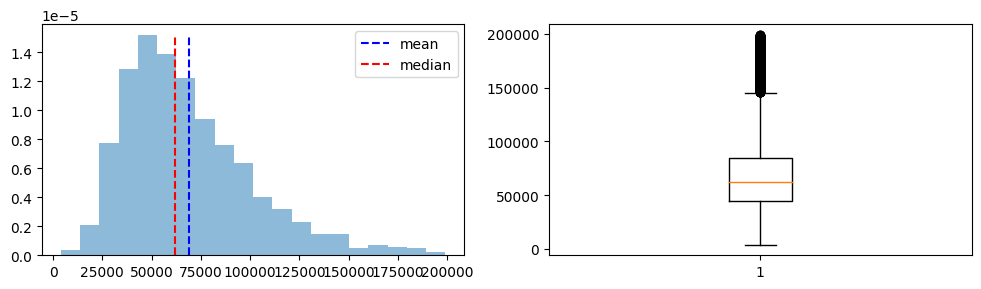

In [ ]:
def main():
    # data
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    print(df.head(3),end="\n\n")
    mean = df.x.mean()
    median = df.x.median()

    # histogram and box plot 
    # long right hand tail
    # meadin < mean
    # if data is not symmetric, meadian is better to locate the center of data
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))
    n, *_ = ax0.hist(df.x,bins=20,density=True,alpha=0.5)
    ax0.plot([mean,mean],[0,n.max()],'--b',label='mean') # mean
    ax0.plot([median,median],[0,n.max()],'--r',label='median') # median
    ax0.legend()
    ax1.boxplot(df.x)
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - sum***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) 
    print(f"Titanic Survival Rate : {df.Survived.sum() / len(df.Survived):.2%}") 

if __name__ == "__main__":
    main()

Titanic Survival Rate : 38.38%


#####***Method - sample [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)***

In [11]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)["PassengerId"]
    print(df.sample(5, random_state=0)) 

if __name__ == "__main__":
    main()

495    496
648    649
278    279
31      32
255    256
Name: PassengerId, dtype: int64


#***PART III DataFrame***

###***Chapter 5 Dataframe*** 

####***Section 1 What is Dataframe [eng](https://www.youtube.com/watch?v=F6kmIpWWEdU&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=3)***

$$\begin{array}{lll}
\text{2D Numpy Array}&\text{Matrix-like data structure}\\
&\text{2D Numpy Array has a particular dtype}\\
\text{DataFrame}&\text{Excel-like data structure}\\
&\text{Each column may have different dtype}\\
\text{Series}&\text{One column of Excel-like data structure}\\
&\text{Series has a particular dtype}\\
\end{array}$$

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png">

Sorce [Creating a Pandas DataFrame](https://www.geeksforgeeks.org/creating-a-pandas-dataframe/)

####***Section 2 How to make Dataframe [eng](https://www.youtube.com/watch?v=3k0HbcUGErE&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=3)***

#####***Provide Column Info***

```
          temperature  windspeed  event
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
```

In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']
    data = {'temperature': temp, 'windspeed': wind, 'event': event}

    df = pd.DataFrame(data, index=day)
    print(df)
    print(f"{df.index = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

          temperature  windspeed  event
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
df.index = Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object')
df.columns = Index(['temperature', 'windspeed', 'event'], dtype='object')


In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']
    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}

    df = pd.DataFrame(data).set_index("day")
    print(df)
    print(f"{df.index = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

          temperature  windspeed  event
day                                    
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
df.index = Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object', name='day')
df.columns = Index(['temperature', 'windspeed', 'event'], dtype='object')


In [ ]:
def main():
    temp  = {'1/1/2017' :     32, '1/2/2017' :      35, '1/3/2017' :     28}
    wind  = {'1/1/2017' :      6, '1/2/2017' :       7, '1/3/2017' :      2}
    event = {'1/1/2017' : 'Rain', '1/2/2017' : 'Sunny', '1/3/2017' : 'Snow'}
    data = {'temperature': temp, 'windspeed': wind, 'event': event}
    
    df = pd.DataFrame(data)
    print(df)
    print(f"{df.index = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

          temperature  windspeed  event
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
df.index = Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object')
df.columns = Index(['temperature', 'windspeed', 'event'], dtype='object')


#####***Provide Row Info***

```
          temperature  windspeed  event
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
```

In [ ]:
def main():
    # row info provided as list/tuple
    data = [
        ['1/1/2017', 32, 6, 'Rain'],
        ['1/2/2017', 35, 7, 'Sunny'],
        ['1/3/2017', 28, 2, 'Snow']
    ]

    columns = ['day', 'temperature', 'windspeed', 'event']
    df = pd.DataFrame(data,columns=columns).set_index("day")
    print(df)
    print(df.index)
    print(df.columns, end='\n\n')

    # row info provided as dict
    data = [
        {'day': '1/1/2017', 'temperature': 32, 'windspeed': 6, 'event': 'Rain'},
        {'day': '1/2/2017', 'temperature': 35, 'windspeed': 7, 'event': 'Sunny'},
        {'day': '1/3/2017', 'temperature': 28, 'windspeed': 2, 'event': 'Snow'}
    ]
    df = pd.DataFrame(data,columns=columns).set_index("day")
    print(df)
    print(f"{df.index = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

          temperature  windspeed  event
day                                    
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object', name='day')
Index(['temperature', 'windspeed', 'event'], dtype='object')

          temperature  windspeed  event
day                                    
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow
Index(['1/1/2017', '1/2/2017', '1/3/2017'], dtype='object', name='day')
Index(['temperature', 'windspeed', 'event'], dtype='object')



#####***Provide Matrix***

```
               A         B         C         D
Jenny   1.764052  0.400157  0.978738  2.240893
Frank   1.867558 -0.977278  0.950088 -0.151357
Wenfei -0.103219  0.410599  0.144044  1.454274
```

In [ ]:
def main():
    data = np.random.normal(size=(3, 4))

    index = ['Jenny', 'Frank', 'Wenfei']
    columns = list('ABCD')
    df = pd.DataFrame(data, index=index, columns=columns)
    print(df)
    print(f"{df.index = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

               A         B         C         D
Jenny   1.764052  0.400157  0.978738  2.240893
Frank   1.867558 -0.977278  0.950088 -0.151357
Wenfei -0.103219  0.410599  0.144044  1.454274
Index(['Jenny', 'Frank', 'Wenfei'], dtype='object')
Index(['A', 'B', 'C', 'D'], dtype='object')



#####***Read CSV File***

Data Sorce http://www.stoxx.com/download/historical_values/hbrbcpe.txt

```
Price Indices - EURO Currency
Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad
        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic
        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF
31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56
01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56
02.01.1987;770.89 ;  891.78 ;   82.57 ;   97.80 ;   97.43 ;   69.37 ;  647.62  ;  65.81
05.01.1987;771.89 ;  898.33 ;   82.82 ;   98.60 ;   98.19 ;   69.16 ;  649.94  ;  65.82
06.01.1987;775.92 ;  902.32 ;   83.28 ;   99.19 ;   98.83 ;   69.50 ;  652.49  ;  66.06
```

        # from 2001-12-27 data format has been changed 
        # ; is added at the end of the line from 2001-12-27 and below

```
21.12.2001;3616.80;  3696.44;   291.39;   306.60;   322.55;   272.18;  5360.52 ;  370.94
24.12.2001;3622.85;  3696.98;   291.90;   306.77;   322.69;   272.95;  5360.52 ;  370.94
27.12.2001;3686.23;  3778.39;   297.11;   312.43;   327.57;   277.68;  5479.59;   378.69;
28.12.2001;3706.93;  3806.13;   298.73;   314.52;   329.94;   278.87;  5585.35;   386.99;
```

Below code fails to read all the data from the file due to the data format inconsistency.

In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    names = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    df = pd.read_csv(
        url,
        index_col=0,
        parse_dates=True,
        dayfirst=True,
        sep=';',
        header=None,
        # from 2001-12-27 data format has been changed 
        # ; is added at the end of the line from 2001-12-27 and below
        # so we skip reading data from 2001-12-27 and below 
        skiprows=lambda x : (x in [0,1,2,3]) or (x >= 3886), 
        names=names
        )
    print(df.head(3))
    print(df.tail(3))
    print(f"{df.index[:3] = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

              SX5P    SX5E   SXXP   SXXE   SXXF   SXXA    DK5F   DKXF
1986-12-31  775.00  900.82  82.76  98.58  98.06  69.06  645.26  65.56
1987-01-01  775.00  900.82  82.76  98.58  98.06  69.06  645.26  65.56
1987-01-02  770.89  891.78  82.57  97.80  97.43  69.37  647.62  65.81
               SX5P     SX5E    SXXP    SXXE    SXXF    SXXA     DK5F    DKXF
2001-12-20  3537.34  3617.47  286.07  300.97  317.10  267.23  5268.36  363.19
2001-12-21  3616.80  3696.44  291.39  306.60  322.55  272.18  5360.52  370.94
2001-12-24  3622.85  3696.98  291.90  306.77  322.69  272.95  5360.52  370.94
df.index[:3] = DatetimeIndex(['1986-12-31', '1987-01-01', '1987-01-02'], dtype='datetime64[ns]', freq=None)
df.columns = Index(['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF'], dtype='object')


In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    names = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    df = pd.read_csv(url)
    print(df.shape)
    print(f"{df.index = }")
    print(f"{df.columns = }")

if __name__ == "__main__":
    main()

(7676, 1)
df.index = RangeIndex(start=0, stop=7676, step=1)
df.columns = Index(['Price Indices - EURO Currency'], dtype='object')


####***Section 3 How to load Dataframe - pd.read_csv [eng](https://www.youtube.com/watch?v=-0NwrcZOKhQ&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=4)***

#####***Keyword - index_col***

In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    es = pd.read_csv(url, 
                    index_col=0, 
                    parse_dates=True, 
                    dayfirst=True,
                    sep=';', 
                    header=None, 
                    skiprows=4, 
                    names=cols)
    print(np.round(es.head()))

if __name__ == "__main__":
    main()

#####***Keyword - parse_dates***

In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    es = pd.read_csv(url, 
                    index_col=0, 
                    parse_dates=True, 
                    dayfirst=True,
                    sep=';', 
                    header=None, 
                    skiprows=4, 
                    names=cols)
    print(np.round(es.head()))

if __name__ == "__main__":
    main()

#####***Keyword - dayfirst***

In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    es = pd.read_csv(url, 
                    index_col=0, 
                    parse_dates=True, 
                    dayfirst=True,
                    sep=';', 
                    header=None, 
                    skiprows=4, 
                    names=cols)
    print(np.round(es.head()))

if __name__ == "__main__":
    main()

#####***Keyword - sep***

In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    es = pd.read_csv(url, 
                    index_col=0, 
                    parse_dates=True, 
                    dayfirst=True,
                    sep=';', 
                    header=None, 
                    skiprows=4, 
                    names=cols)
    print(np.round(es.head()))

if __name__ == "__main__":
    main()

#####***Keyword - header [doc](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)***

- header = 'infer' : default
- header = None : no header in the file
- header = int : the int line in the file is header and all the lines above ignored
- header = list of ints : the int lines in the file is header and all the lines above ignored

In [ ]:
%%writefile data.csv
Courses,Fee,Duration,Discount
Spark,25000,50 Days,2000
Pandas,20000,35 Days,1000
Java,15000,NaN,800
Python,15000,30 Days,500
PHP,18000,30 Days,800

Overwriting data.csv


In [ ]:
def main():
    path = 'data.csv'
    # header = 'infer' : default
    df = pd.read_csv(path) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration  Discount
0   Spark  25000  50 Days      2000
1  Pandas  20000  35 Days      1000
2    Java  15000      NaN       800
3  Python  15000  30 Days       500
4     PHP  18000  30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    # header = None : no header in the file
    df = pd.read_csv(path, header=None) 
    print(df)

if __name__ == "__main__":
    main()

         0      1         2         3
0  Courses    Fee  Duration  Discount
1    Spark  25000   50 Days      2000
2   Pandas  20000   35 Days      1000
3     Java  15000       NaN       800
4   Python  15000   30 Days       500
5      PHP  18000   30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    names = ['SX5P', 'SX5E', 'SXXP', 'SXXE']
    # header = None : no header in the file
    df = pd.read_csv(path, header=None, names=names) 
    print(df)

if __name__ == "__main__":
    main()

      SX5P   SX5E      SXXP      SXXE
0  Courses    Fee  Duration  Discount
1    Spark  25000   50 Days      2000
2   Pandas  20000   35 Days      1000
3     Java  15000       NaN       800
4   Python  15000   30 Days       500
5      PHP  18000   30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    # header = int : the int line in the file is header and 
    # all the lines above ignored
    df = pd.read_csv(path, header=0) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration  Discount
0   Spark  25000  50 Days      2000
1  Pandas  20000  35 Days      1000
2    Java  15000      NaN       800
3  Python  15000  30 Days       500
4     PHP  18000  30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    # header = int : the int line in the file is header and 
    # all the lines above ignored
    df = pd.read_csv(path, header=1) 
    print(df)

if __name__ == "__main__":
    main()

    Spark  25000  50 Days  2000
0  Pandas  20000  35 Days  1000
1    Java  15000      NaN   800
2  Python  15000  30 Days   500
3     PHP  18000  30 Days   800


In [ ]:
def main():
    path = 'data.csv'
    # header = int : the int line in the file is header and 
    # all the lines above ignored
    df = pd.read_csv(path, header=2) 
    print(df)

if __name__ == "__main__":
    main()

   Pandas  20000  35 Days  1000
0    Java  15000      NaN   800
1  Python  15000  30 Days   500
2     PHP  18000  30 Days   800


In [ ]:
def main():
    path = 'data.csv'
    # header = list of ints : the int lines in the file is header and 
    # all the lines above ignored
    df = pd.read_csv(path, header=[0,2]) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration Discount
   Pandas  20000  35 Days     1000
0    Java  15000      NaN      800
1  Python  15000  30 Days      500
2     PHP  18000  30 Days      800


#####***Keyword - skiprows [doc](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)***

- skiprows = None (default) : no skip
- skiprows = int : skip int amount of lines from the top 
- skiprows = list of ints : skip int lines (0-indexed)
- skiprows = callable : skip int lines (0-indexed) of True values

In [ ]:
%%writefile data.csv
Courses,Fee,Duration,Discount
Spark,25000,50 Days,2000
Pandas,20000,35 Days,1000
Java,15000,NaN,800
Python,15000,30 Days,500
PHP,18000,30 Days,800

Overwriting data.csv


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = None : no skip
    df = pd.read_csv(path) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration  Discount
0   Spark  25000  50 Days      2000
1  Pandas  20000  35 Days      1000
2    Java  15000      NaN       800
3  Python  15000  30 Days       500
4     PHP  18000  30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = int : skip int amount of lines from the top 
    df = pd.read_csv(path, skiprows=0) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration  Discount
0   Spark  25000  50 Days      2000
1  Pandas  20000  35 Days      1000
2    Java  15000      NaN       800
3  Python  15000  30 Days       500
4     PHP  18000  30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = int : skip int amount of lines from the top 
    df = pd.read_csv(path, skiprows=1) 
    print(df)

if __name__ == "__main__":
    main()

    Spark  25000  50 Days  2000
0  Pandas  20000  35 Days  1000
1    Java  15000      NaN   800
2  Python  15000  30 Days   500
3     PHP  18000  30 Days   800


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = int : skip int amount of lines from the top 
    df = pd.read_csv(path, skiprows=2) 
    print(df)

if __name__ == "__main__":
    main()

   Pandas  20000  35 Days  1000
0    Java  15000      NaN   800
1  Python  15000  30 Days   500
2     PHP  18000  30 Days   800


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = int : skip int amount of lines from the top 
    df = pd.read_csv(path, skiprows=3) 
    print(df)

if __name__ == "__main__":
    main()

     Java  15000      NaN  800
0  Python  15000  30 Days  500
1     PHP  18000  30 Days  800


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = list of ints : skip int lines (0-indexed)
    df = pd.read_csv(path, skiprows=[1,3]) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration  Discount
0  Pandas  20000  35 Days      1000
1  Python  15000  30 Days       500
2     PHP  18000  30 Days       800


In [ ]:
def main():
    path = 'data.csv'
    # skiprows = callable : skip int lines (0-indexed) of True values
    df = pd.read_csv(path, skiprows=lambda x : x in [1,3]) 
    print(df)

if __name__ == "__main__":
    main()

  Courses    Fee Duration  Discount
0  Pandas  20000  35 Days      1000
1  Python  15000  30 Days       500
2     PHP  18000  30 Days       800


#####***Keyword - names***

In [ ]:
def main():
    url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
    cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
    es = pd.read_csv(url, 
                    index_col=0, 
                    parse_dates=True, 
                    dayfirst=True,
                    sep=';', 
                    header=None, 
                    skiprows=4, 
                    names=cols)
    print(np.round(es.head()))

if __name__ == "__main__":
    main()

####***Section 4 How to load Dataframe - pd.read_table***

#####***Keyword - sep***

In [ ]:
def main():
    df = pd.read_table('http://bit.ly/movieusers', sep='|')
    print(df.head())

if __name__ == "__main__":
    main()

#####***Keyword - header***

In [ ]:
def main():
    df = pd.read_table('http://bit.ly/movieusers', sep='|', header=None)
    print(df.head())

if __name__ == "__main__":
    main()

#####***Keyword - usecols***

In [ ]:
def main():
    names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    df = pd.read_table(
        'http://bit.ly/movieusers',
        sep='|',
        header=None,
        names=names,
        usecols=['age', 'gender', 'occupation', 'zip_code']
    )
    print(df.head())

if __name__ == "__main__":
    main()

####***Section 5 How to load Dataframe - pd.read_excel***

In [ ]:
def main():
    url = 'https://github.com/codebasics/py/blob/master/pandas/3_different_ways_of_creating_dataframe/weather_data.xlsx?raw=true'
    df = pd.read_excel(url, "Sheet1")
    print(df.head())

if __name__ == "__main__":
    main()

####***Section 6 How to load Dataframe - pd.read_json***

#####***What is JSON File***

JSON (존슨) 은 자바스크립트 문법이 아닙니다 [kor](https://www.youtube.com/watch?v=1ID6pfTViXo)

#####***How to load Dataframe - pd.read_json***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/kenvilar/data-analysis-using-python/master/supermarkets.json'
    df = pd.read_json(url)
    print(df.head())

if __name__ == "__main__":
    main()

NameError: ignored

####***Section 7 How to load Dataframe - pd.read_fwf***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/ikding/pycon_time_series/master/data/ao_monthly.txt'
    df = pd.read_fwf(url)
    print(df.head())

if __name__ == "__main__":
    main()

####***Section 8 How to load Dataframe - pd.HDFStore***

#####***What is an H5 file?***


An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data. H5 files are commonly used in aerospace, physics, engineering, finance, academic research, genomics, astronomy, electronics instruments, and medical fields.

[.H5 File Extension](https://fileinfo.com/extension/h5#:~:text=An%20H5%20file%20is%20a,multidimensional%20arrays%20of%20scientific%20data.)

#####***Load H5 File to Colab***

In [ ]:
from google.colab import files
uploaded = files.upload() 
# choose vstoxx_data_31032014.h5 from your local directory to upload to colab
# you can download vstoxx_data_31032014.h5 at https://github.com/psygement/financepy/blob/master/part1/ch03/source/vstoxx_data_31032014.h5

Saving vstoxx_data_31032014.h5 to vstoxx_data_31032014.h5


#####***Read H5 File***

In [ ]:
def main():
    h5 = pd.HDFStore('./vstoxx_data_31032014.h5', 'r') 
    print(f"{h5 = }", "-"*20, sep="\n", end="\n\n") # dict-like object
    print(f"{h5.keys() = }", "-"*20, sep="\n", end="\n\n") # keys
    h5.close()

if __name__ == "__main__":
    main()

h5 = <class 'pandas.io.pytables.HDFStore'>
File path: ./vstoxx_data_31032014.h5

--------------------

h5.keys() = ['/futures_data', '/options_data']
--------------------



In [ ]:
def main():
    h5 = pd.HDFStore('./vstoxx_data_31032014.h5', 'r') 
    futures_data = h5['/futures_data']  # VSTOXX futures data
    options_data = h5['/options_data']  # VSTOXX call option data
    h5.close()
    
    print(f"{type(futures_data) = }", futures_data, sep="\n", end="\n\n")
    print(f"{type(options_data) = }", options_data, sep="\n", end="\n\n")

if __name__ == "__main__":
    main()

type(futures_data) = <class 'pandas.core.frame.DataFrame'>
          DATE  EXP_YEAR  EXP_MONTH  PRICE   MATURITY    TTM
496 2014-03-31      2014          4  17.85 2014-04-18  0.049
497 2014-03-31      2014          5  19.55 2014-05-16  0.126
498 2014-03-31      2014          6  19.95 2014-06-20  0.222
499 2014-03-31      2014          7  20.40 2014-07-18  0.299
500 2014-03-31      2014          8  20.70 2014-08-15  0.375
501 2014-03-31      2014          9  20.95 2014-09-19  0.471
502 2014-03-31      2014         10  21.05 2014-10-17  0.548
503 2014-03-31      2014         11  21.25 2014-11-21  0.644

type(options_data) = <class 'pandas.core.frame.DataFrame'>
            DATE  EXP_YEAR  EXP_MONTH TYPE  STRIKE  PRICE   MATURITY    TTM
46170 2014-03-31      2014          4    C     1.0  16.85 2014-04-18  0.049
46171 2014-03-31      2014          4    C     2.0  15.85 2014-04-18  0.049
46172 2014-03-31      2014          4    C     3.0  14.85 2014-04-18  0.049
46173 2014-03-31      2014  

In [ ]:
def main():
    h5 = pd.HDFStore('./vstoxx_data_31032014.h5', 'r') 
    futures_data = h5['futures_data']  # VSTOXX futures data
    options_data = h5['options_data']  # VSTOXX call option data
    h5.close()
    
    print(f"{type(futures_data) = }", futures_data, sep="\n", end="\n\n")
    print(f"{type(options_data) = }", options_data, sep="\n", end="\n\n")

if __name__ == "__main__":
    main()

type(futures_data) = <class 'pandas.core.frame.DataFrame'>
          DATE  EXP_YEAR  EXP_MONTH  PRICE   MATURITY    TTM
496 2014-03-31      2014          4  17.85 2014-04-18  0.049
497 2014-03-31      2014          5  19.55 2014-05-16  0.126
498 2014-03-31      2014          6  19.95 2014-06-20  0.222
499 2014-03-31      2014          7  20.40 2014-07-18  0.299
500 2014-03-31      2014          8  20.70 2014-08-15  0.375
501 2014-03-31      2014          9  20.95 2014-09-19  0.471
502 2014-03-31      2014         10  21.05 2014-10-17  0.548
503 2014-03-31      2014         11  21.25 2014-11-21  0.644

type(options_data) = <class 'pandas.core.frame.DataFrame'>
            DATE  EXP_YEAR  EXP_MONTH TYPE  STRIKE  PRICE   MATURITY    TTM
46170 2014-03-31      2014          4    C     1.0  16.85 2014-04-18  0.049
46171 2014-03-31      2014          4    C     2.0  15.85 2014-04-18  0.049
46172 2014-03-31      2014          4    C     3.0  14.85 2014-04-18  0.049
46173 2014-03-31      2014  

####***Section 8 How to call Columns***

#####***df.Close***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.Close.head(3))

if __name__ == "__main__":
    main()

Date
2020-01-02 00:00:00-05:00    112.910912
2020-01-03 00:00:00-05:00    111.914101
2020-01-06 00:00:00-05:00    111.686287
Name: Close, dtype: float64


#####***df['Close']***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df['Close'].head(3))

if __name__ == "__main__":
    main()

Date
2020-01-02 00:00:00-05:00    112.910904
2020-01-03 00:00:00-05:00    111.914108
2020-01-06 00:00:00-05:00    111.686279
Name: Close, dtype: float64


#####***df[['Close']]***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df[['Close']].head(3))

if __name__ == "__main__":
    main()

                                Close
Date                                 
2020-01-02 00:00:00-05:00  112.910881
2020-01-03 00:00:00-05:00  111.914124
2020-01-06 00:00:00-05:00  111.686264


#####***df[['Open','Close']]***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df[['Open','Close']].head(3))

if __name__ == "__main__":
    main()

                                 Open       Close
Date                                             
2020-01-02 00:00:00-05:00  112.834950  112.910896
2020-01-03 00:00:00-05:00  112.274843  111.914108
2020-01-06 00:00:00-05:00  111.448952  111.686279


#####***df[0]***

In [ ]:
def main():
    df = pd.DataFrame([1,2,3]) 
    print(f"{df.shape = }")
    print("df---------------")
    print(df)
    print("df---------------")
    print(f"{df.columns = }")
    print(f"{df.columns[0] = }, {type(df.columns[0]) = }",end="\n\n")

    print(f"{df[0].shape = }")
    print("df[0]---------------")
    print(df[0])
    print("df[0]---------------")

if __name__ == "__main__":
    main()

df.shape = (3, 1)
df---------------
   0
0  1
1  2
2  3
df---------------
df.columns = RangeIndex(start=0, stop=1, step=1)
df.columns[0] = 0, type(df.columns[0]) = <class 'int'>

df[0].shape = (3,)
df[0]---------------
0    1
1    2
2    3
Name: 0, dtype: int64
df[0]---------------


###***Chapter 6 Dataframe Attribute***

#####***Attribute - shape***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) # dataframe
    print(df.shape)

    df = df[["Survived","Sex"]] # dataframe
    print(df.shape)

    df = df[["Survived"]] # dataframe
    print(df.shape)

    df = df["Survived"] # series
    print(df.shape)

if __name__ == "__main__":
    main()

(891, 12)
(891, 2)
(891, 1)
(891,)


#####***dtype is not Dataframe Attribute***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) # dataframe
    try:
        print(df.dtype)
    except AttributeError as e:
        print(e)
    print(df.dtypes)

    df = df["Survived"] # series
    print(df.dtype)

if __name__ == "__main__":
    main()

'DataFrame' object has no attribute 'dtype'
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
int64


#####***Attribute - index***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.index)
    print(df.index[0])
    print(type(df.index[0]))

if __name__ == "__main__":
    main()

DatetimeIndex(['2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               ...
               '2020-12-16 00:00:00-05:00', '2020-12-17 00:00:00-05:00',
               '2020-12-18 00:00:00-05:00', '2020-12-21 00:00:00-05:00',
               '2020-12-22 00:00:00-05:00', '2020-12-23 00:00:00-05:00',
               '2020-12-24 00:00:00-05:00', '2020-12-28 00:00:00-05:00',
               '2020-12-29 00:00:00-05:00', '2020-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=252, freq=None)
2020-01-02 00:00:00-05:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


###### ***shape***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) # dataframe
    print(df.shape)

    df = df[["Survived","Sex"]] # dataframe
    print(df.shape)

    df = df[["Survived"]] # dataframe
    print(df.shape)

    df = df["Survived"] # series
    print(df.shape)

if __name__ == "__main__":
    main()

(891, 12)
(891, 2)
(891, 1)


###### ***values***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    x = df.values
    print(f"{x.shape = }")
    print(f"{x[1:2,2:3].shape = }")
    print(f"{x[1:2,2].shape = }")
    print(f"{x[1,2].shape = }")

if __name__ == "__main__":
    main()

#####***Attribute - columns***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.columns)
    print(df.columns[0])
    print(type(df.columns[0]))

if __name__ == "__main__":
    main()

#####***Attribute - values***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(f"{type(df.values) = }, {df.values.shape = }, {df.values.dtype = }")
    print(f"{type(df.Close.values) = }, {df.Close.values.shape = }, {df.Close.values.dtype = }")

if __name__ == "__main__":
    main()

type(df.values) = <class 'numpy.ndarray'>, df.values.shape = (252, 7), df.values.dtype = dtype('float64')
type(df.Close.values) = <class 'numpy.ndarray'>, df.Close.values.shape = (252,), df.Close.values.dtype = dtype('float64')


###***Chapter 7 Dataframe Method***

####***Section 1 Basic Dataframe Method***

#####***Method - head and tail***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    # df.head() shows the first 5 rows
    print(df.head(),end="\n\n") # default is first 5 rows
    print(df.head(3),end="\n\n") # first 3 row

    # df.tail() shows the first 5 rows
    print(df.tail(),end="\n\n") # default is last 5 rows
    print(df.tail(3),end="\n\n") # last 3 row

if __name__ == "__main__":
    main()

                                 Open        High         Low       Close
Date                                                                     
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889
2020-01-03 00:00:00-05:00  112.274836  112.768481  111.629305  111.914101
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279
2020-01-07 00:00:00-05:00  111.316056  111.562871  110.309783  110.651535
2020-01-08 00:00:00-05:00  110.404708  110.812911  109.816133  110.271805

                                 Open        High         Low       Close
Date                                                                     
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889
2020-01-03 00:00:00-05:00  112.274836  112.768481  111.629305  111.914101
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279

                                 Open        High         Low       Close
Date                                

#####***Method - info***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.info(),end="\n\n")

if __name__ == "__main__":
    main()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 00:00:00-05:00 to 2020-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB
None



#####***Method - describe [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(f"{type(df.describe()) = }")
    print(df.describe())

if __name__ == "__main__":
    main()

type(df.describe()) = <class 'pandas.core.frame.DataFrame'>
             Open        High         Low       Close        Volume  \
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02   
mean   123.956975  125.379849  122.643414  124.035472  9.073630e+06   
std     12.303170   12.057434   12.342816   12.102317  5.030577e+06   
min     99.867369  103.019089   96.829581   98.775673  3.018200e+06   
25%    113.252891  114.550824  111.974437  113.290361  5.978500e+06   
50%    123.740215  124.669181  122.206625  123.312702  7.453700e+06   
75%    135.639578  136.649279  134.555313  135.038536  1.062470e+07   
max    147.708171  147.765867  145.842584  146.929260  3.967290e+07   

        Dividends  Stock Splits  
count  252.000000         252.0  
mean     0.008571           0.0  
std      0.067626           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.540000           

#####***Method - copy***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    dg = df.copy()
    
    df.iloc[0, 0] = 1156.98003
    print(f"{df.iloc[0, 0] = }")
    print(f"{dg.iloc[0, 0] = }")

if __name__ == "__main__":
    main()

df.iloc[0, 0] = 1156.98003
dg.iloc[0, 0] = 112.83494216393532


#####***Method - set_index***

In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']

    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}
    df = pd.DataFrame(data)
    df.set_index('day', inplace=True)  
    print(df)

if __name__ == "__main__":
    main()

          temperature  windspeed  event
day                                    
1/1/2017           32          6   Rain
1/2/2017           35          7  Sunny
1/3/2017           28          2   Snow


#####***Method - isna and isnull [blog](https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas)***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends', 'Stock Splits'], inplace=True)
    df.iloc[1,1] = np.nan
    df.iloc[2,2] = np.nan
    
    print(f"{df.isna().head(3) = }")
    print(f"{df.isnull().head(3) = }")

if __name__ == "__main__":
    main()

df.isna().head(3) =                             Open   High    Low  Close
Date                                                 
2020-01-02 00:00:00-05:00  False  False  False  False
2020-01-03 00:00:00-05:00  False   True  False  False
2020-01-06 00:00:00-05:00  False  False   True  False
df.isnull().head(3) =                             Open   High    Low  Close
Date                                                 
2020-01-02 00:00:00-05:00  False  False  False  False
2020-01-03 00:00:00-05:00  False   True  False  False
2020-01-06 00:00:00-05:00  False  False   True  False


#####***Method - any***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends', 'Stock Splits'], inplace=True)
    df.iloc[1,1] = np.nan
    df.iloc[2,2] = np.nan
    
    print(df.isnull().any())

if __name__ == "__main__":
    main()

Open     False
High      True
Low       True
Close    False
dtype: bool


#####***Method - sum***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends', 'Stock Splits'], inplace=True)
    df.iloc[1,1] = np.nan
    df.iloc[2,2] = np.nan
    
    print(df.isnull().sum())

if __name__ == "__main__":
    main()

Open     0
High     1
Low      1
Close    0
dtype: int64


#####***Method - count [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends', 'Stock Splits'], inplace=True)
    df.iloc[1,1] = np.nan
    df.iloc[2,2] = np.nan
    
    print(df.count())

if __name__ == "__main__":
    main()

Open     252
High     251
Low      251
Close    252
dtype: int64


#####***Method - min and max***

In [ ]:
import tarfile
import urllib.request

def main():
    # download
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
    path = "./housing.tgz"
    urllib.request.urlretrieve(url, path)

    # extract
    housing_path = "./"
    housing_tgz = tarfile.open(path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    csv_path = "./housing.csv"
    df = pd.read_csv(csv_path)

    print(f"{df.median_income.min() = }")
    print(f"{df.median_house_value.min() = }",end="\n\n")
    print(f"{df.median_income.max() = }")
    print(f"{df.median_house_value.max() = }")

if __name__ == "__main__":
    main()

df.median_income.min() = 0.4999
df.median_house_value.min() = 14999.0

df.median_income.max() = 15.0001
df.median_house_value.max() = 500001.0



In [ ]:
import tarfile
import urllib.request

def main():
    # download
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
    path = "./housing.tgz"
    urllib.request.urlretrieve(url, path)

    # extract
    housing_path = "./"
    housing_tgz = tarfile.open(path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    csv_path = "./housing.csv"
    df = pd.read_csv(csv_path)

    print(f"{df.min() = }")
    print(f"{df.max() = }")

if __name__ == "__main__":
    main()

df.min() = longitude               -124.35
latitude                  32.54
housing_median_age          1.0
total_rooms                 2.0
total_bedrooms              1.0
population                  3.0
households                  1.0
median_income            0.4999
median_house_value      14999.0
ocean_proximity       <1H OCEAN
dtype: object
df.max() = longitude                -114.31
latitude                   41.95
housing_median_age          52.0
total_rooms              39320.0
total_bedrooms            6445.0
population               35682.0
households                6082.0
median_income            15.0001
median_house_value      500001.0
ocean_proximity       NEAR OCEAN
dtype: object


#####***Method - drop***

In [ ]:
def main():
    ticker = "WMT"
    start = "2022-01-01"
    end = "2022-12-31"
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.drop(columns=['Volume','Dividends', 'Stock Splits'], inplace=True)
    print(df.head(3))

if __name__ == "__main__":
    main()

                                 Open        High         Low       Close
Date                                                                     
2022-01-03 00:00:00-05:00  141.192741  141.967333  140.222035  141.830063
2022-01-04 00:00:00-05:00  141.231959  142.310521  138.996409  139.231735
2022-01-05 00:00:00-05:00  140.065186  143.104743  139.957330  141.114319


#####***Method - iterrows***

In [ ]:
def main():
    ticker = "WMT"
    start = "2022-01-01"
    end = "2022-01-06"
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.drop(columns=['Volume','Dividends', 'Stock Splits'], inplace=True)
    
    for date, series in df.iterrows():
        print(date)
        print('-'*19)
        print(series)
        print('-'*70)

if __name__ == "__main__":
    main()

2022-01-03 00:00:00-05:00
-------------------
Open     141.192741
High     141.967333
Low      140.222035
Close    141.830063
Name: 2022-01-03 00:00:00-05:00, dtype: float64
----------------------------------------------------------------------
2022-01-04 00:00:00-05:00
-------------------
Open     141.231959
High     142.310521
Low      138.996409
Close    139.231735
Name: 2022-01-04 00:00:00-05:00, dtype: float64
----------------------------------------------------------------------
2022-01-05 00:00:00-05:00
-------------------
Open     140.065186
High     143.104743
Low      139.957330
Close    141.114319
Name: 2022-01-05 00:00:00-05:00, dtype: float64
----------------------------------------------------------------------


#####***Method - apply [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') 
    bool_msking = df.Sex.apply(lambda x: x == "female")
    print(bool_msking)

if __name__ == "__main__":
    main()

PassengerId
1      False
2       True
3       True
4       True
5      False
       ...  
887    False
888     True
889     True
890    False
891    False
Name: Sex, Length: 891, dtype: bool


In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') 
    bool_msking = df.apply(lambda x: x.Sex == "female", axis=1)
    print(bool_msking)

if __name__ == "__main__":
    main()

PassengerId
1      False
2       True
3       True
4       True
5      False
       ...  
887    False
888     True
889     True
890    False
891    False
Length: 891, dtype: bool


#####***Method - agg [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)***

In [ ]:
def main():
    ticker = "WMT"
    start = "2020-01-30"
    end = "2022-12-31"
    df = yf.Ticker(ticker).history(start=start,end=end)
    df = df[["Open","Close"]].pct_change()
    print(df.head(),end="\n\n")

    def max_minus_min(x): return x.max() - x.min()
    dg = df.agg(['std','max','min',max_minus_min])
    print(dg.head())

if __name__ == "__main__":
    main()

                               Open     Close
Date                                         
2020-01-30 00:00:00-05:00       NaN       NaN
2020-01-31 00:00:00-05:00  0.001643 -0.017928
2020-02-03 00:00:00-05:00 -0.007772 -0.001922
2020-02-04 00:00:00-05:00  0.002959  0.008751
2020-02-05 00:00:00-05:00  0.003124  0.013360

                   Open     Close
std            0.015956  0.016369
max            0.087050  0.117085
min           -0.097779 -0.113758
max_minus_min  0.184829  0.230843


In [ ]:
def main():
    ticker = "WMT"
    start = "2020-01-30"
    end = "2022-12-31"
    df = yf.Ticker(ticker).history(start=start,end=end)
    df = df[["Open","Close"]].pct_change()
    print(df.head(),end="\n\n")

    def max_minus_min(x): return x.max() - x.min()
    dg = df.agg({"Open":['std'],"Close":['std',max_minus_min]})
    print(dg.head())

if __name__ == "__main__":
    main()

                               Open     Close
Date                                         
2020-01-30 00:00:00-05:00       NaN       NaN
2020-01-31 00:00:00-05:00  0.001644 -0.017927
2020-02-03 00:00:00-05:00 -0.007772 -0.001922
2020-02-04 00:00:00-05:00  0.002959  0.008751
2020-02-05 00:00:00-05:00  0.003124  0.013360

                   Open     Close
std            0.015956  0.016369
max_minus_min       NaN  0.230843


#####***Method - to_csv***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.to_csv(f'{ticker}.csv')

if __name__ == "__main__":
    main()

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  113.297422  114.279218  113.144907  113.373680   
2020-01-03 00:00:00-05:00  112.735024  113.230692  112.086847  112.372810   
2020-01-06 00:00:00-05:00  111.905758  112.563462  111.305237  112.144058   
2020-01-07 00:00:00-05:00  111.772302  112.020128  110.761904  111.105057   
2020-01-08 00:00:00-05:00  110.857218  111.267094  110.266231  110.723770   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  
2020-01-07 00:00:00-05:00  6846900        0.0           0.0  
2020-01-08 00:00:00-05:00  5875800        0.0           0.0  

                         

#####***Method - to_excel***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.to_excel(f'{ticker}.xlsx', sheet_name="stocks")

if __name__ == "__main__":
    main()

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  113.297422  114.279218  113.144907  113.373680   
2020-01-03 00:00:00-05:00  112.735024  113.230692  112.086847  112.372810   
2020-01-06 00:00:00-05:00  111.905758  112.563462  111.305237  112.144058   
2020-01-07 00:00:00-05:00  111.772302  112.020128  110.761904  111.105057   
2020-01-08 00:00:00-05:00  110.857218  111.267094  110.266231  110.723770   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  
2020-01-07 00:00:00-05:00  6846900        0.0           0.0  
2020-01-08 00:00:00-05:00  5875800        0.0           0.0  

                         

####***Section 2 Statistics Dataframe Method***

#####***Method - mean, std, var, cov, corr***

In [ ]:
import tarfile
import urllib.request

def main():
    # download
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
    path = "./housing.tgz"
    urllib.request.urlretrieve(url, path)

    # extract
    housing_path = "./"
    housing_tgz = tarfile.open(path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    csv_path = "./housing.csv"
    df = pd.read_csv(csv_path)

    print(f"{df.median_income.mean() = }")
    print(f"{df.median_income.std() = }")
    print(f"{df.median_income.var() = }")

if __name__ == "__main__":
    main()

df.median_income.mean() = 3.8706710029069766
df.median_income.std() = 1.8998217179452688
df.median_income.var() = 3.6093225599765124


In [ ]:
import tarfile
import urllib.request

def main():
    # download
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
    path = "./housing.tgz"
    urllib.request.urlretrieve(url, path)

    # extract
    housing_path = "./"
    housing_tgz = tarfile.open(path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    csv_path = "./housing.csv"
    df = pd.read_csv(csv_path)

    print(f"{df.mean() = }",end="\n\n")
    print(f"{df.std() = }",end="\n\n")
    print(f"{df.var() = }",end="\n\n")
    print(f"{df.cov() = }",end="\n\n")
    print(f"{df.corr() = }")

if __name__ == "__main__":
    main()

df.mean() = longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

df.std() = longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

df.var() = longitude             4.014139e+00
latitude              4.562293e+00
housing_median_age    1.583963e+02
total_rooms           4.759445e+06
total_bedrooms        1.775654e+05
population            1.282470e+06
households            1.461760e+05
median_income         3.609323e+00
median

<ipython-input-22-e3e152f680d1>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"{df.mean() = }",end="\n\n")
<ipython-input-22-e3e152f680d1>:20: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"{df.std() = }",end="\n\n")
<ipython-input-22-e3e152f680d1>:21: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this 

#####***Method - sample [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)***

In [12]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) 
    print(df.sample(5, random_state=0)) 

if __name__ == "__main__":
    main()

     PassengerId  Survived  Pclass  \
495          496         0       3   
648          649         0       3   
278          279         0       3   
31            32         1       1   
255          256         1       3   

                                               Name     Sex   Age  SibSp  \
495                           Yousseff, Mr. Gerious    male   NaN      0   
648                              Willey, Mr. Edward    male   NaN      0   
278                              Rice, Master. Eric    male   7.0      4   
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
255         Touma, Mrs. Darwis (Hanne Youssef Razi)  female  29.0      0   

     Parch         Ticket      Fare Cabin Embarked  
495      0           2627   14.4583   NaN        C  
648      0  S.O./P.P. 751    7.5500   NaN        S  
278      1         382652   29.1250   NaN        Q  
31       0       PC 17569  146.5208   B78        C  
255      2           2650   15.2458   NaN        

####***Section 3 Groupby Method [eng](https://www.youtube.com/watch?v=Wb2Tp35dZ-I&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=7)***

#####***GroupBy Object***

In [ ]:
def main():
    data = {
        'day' : ['1/1/20','1/2/20','1/1/20','1/2/20','1/1/20','1/2/20'],
        "city" : ["NY","NY","SF","SF","LA","LA"],
        "temperature" : [21, 14, 25, 32, 36, 42],
        "humidity" : [31, 15, 36, 22, 16, 29],
        "event" : ['sunny','rain','snow','sunny','snow','snow']
    }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    dg = df.groupby("city")
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

      day city  temperature  humidity  event
0  1/1/20   NY           21        31  sunny
1  1/2/20   NY           14        15   rain
2  1/1/20   SF           25        36   snow
3  1/2/20   SF           32        22  sunny
4  1/1/20   LA           36        16   snow
5  1/2/20   LA           42        29   snow




#####***Iteration using GroupBy Object***

In [ ]:
def main():
    data = {
        'day' : ['1/1/20','1/2/20','1/1/20','1/2/20','1/1/20','1/2/20'],
        "city" : ["NY","NY","SF","SF","LA","LA"],
        "temperature" : [21, 14, 25, 32, 36, 42],
        "humidity" : [31, 15, 36, 22, 16, 29],
        "event" : ['sunny','rain','snow','sunny','snow','snow']
    }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    for city, df_city in df.groupby("city"):
        print(city)
        print(df_city) 
        print()

if __name__ == "__main__":
    main()

      day city  temperature  humidity  event
0  1/1/20   NY           21        31  sunny
1  1/2/20   NY           14        15   rain
2  1/1/20   SF           25        36   snow
3  1/2/20   SF           32        22  sunny
4  1/1/20   LA           36        16   snow
5  1/2/20   LA           42        29   snow

LA
      day city  temperature  humidity event
4  1/1/20   LA           36        16  snow
5  1/2/20   LA           42        29  snow

NY
      day city  temperature  humidity  event
0  1/1/20   NY           21        31  sunny
1  1/2/20   NY           14        15   rain

SF
      day city  temperature  humidity  event
2  1/1/20   SF           25        36   snow
3  1/2/20   SF           32        22  sunny



#####***GroupBy Method - getgroup***

In [ ]:
def main():
    data = {
        'day' : ['1/1/20','1/2/20','1/1/20','1/2/20','1/1/20','1/2/20'],
        "city" : ["NY","NY","SF","SF","LA","LA"],
        "temperature" : [21, 14, 25, 32, 36, 42],
        "humidity" : [31, 15, 36, 22, 16, 29],
        "event" : ['sunny','rain','snow','sunny','snow','snow']
    }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    dg = df.groupby("city")
    print(dg.get_group("NY"))

if __name__ == "__main__":
    main()

      day city  temperature  humidity  event
0  1/1/20   NY           21        31  sunny
1  1/2/20   NY           14        15   rain
2  1/1/20   SF           25        36   snow
3  1/2/20   SF           32        22  sunny
4  1/1/20   LA           36        16   snow
5  1/2/20   LA           42        29   snow

      day city  temperature  humidity  event
0  1/1/20   NY           21        31  sunny
1  1/2/20   NY           14        15   rain


####***Section 4 Method - pivot and pivot_table [eng](https://www.youtube.com/watch?v=xPPs59pn6qU&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=10)***

#####***Method - pivot [eng](https://www.youtube.com/watch?v=v5ijNXvlC5A) [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)***

Before

```
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292
```

After `df = df.pivot(index='Date', columns='Source', values='Mean')`
```
Source        GCAG  GISTEMP
Date                       
1880-01-06  0.0009    -0.30
1880-02-06 -0.1229    -0.21
1880-03-06 -0.1357    -0.18
1880-04-06 -0.0499    -0.27
1880-05-06 -0.0738    -0.14
```

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292



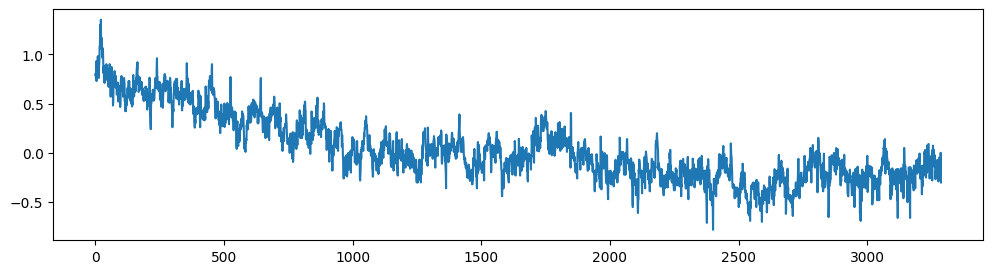

Source        GCAG  GISTEMP
Date                       
1880-01-06  0.0009    -0.30
1880-02-06 -0.1229    -0.21
1880-03-06 -0.1357    -0.18
1880-04-06 -0.0499    -0.27
1880-05-06 -0.0738    -0.14



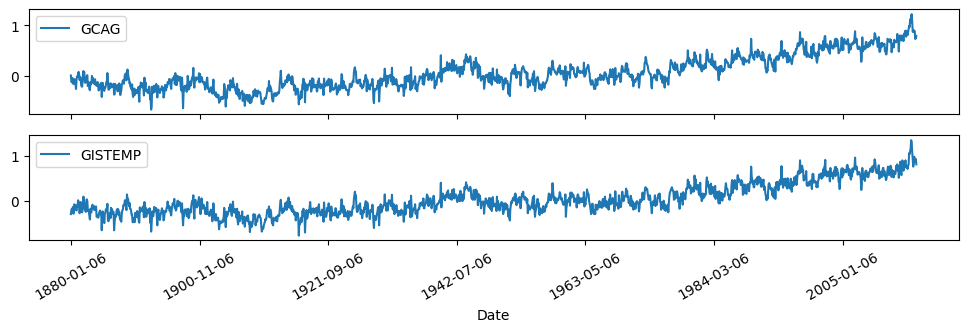

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/theJollySin/scipy_con_2019/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/StateSpaceModels/global_temps.csv'
    df = pd.read_csv(url)
    print(df.head(),end="\n\n")
    fig, ax = plt.subplots(figsize=(12,3))
    df.Mean.plot(ax=ax)
    plt.show()

    df = df.pivot(index='Date', columns='Source', values='Mean')
    print(df.head(),end="\n\n")
    fig, (ax0, ax1) = plt.subplots(2,1,figsize=(12,3))
    df.GCAG.plot(ax=ax0,label="GCAG",sharex=True)
    df.GISTEMP.plot(rot=30,ax=ax1,label="GISTEMP")
    for ax in (ax0, ax1): 
        ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

#####***Method - pivot_table [eng](https://www.youtube.com/watch?v=xPPs59pn6qU) [doc](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)***

For anyone who is still interested in the difference between pivot and pivot_table, there are mainly two differences:

- pivot_table is a generalization of pivot that can handle duplicate values for one pivoted index/column pair. Specifically, you can give pivot_table a list of aggregation functions using keyword argument aggfunc. The default aggfunc of pivot_table is numpy.mean.

- pivot_table also supports using multiple columns for the index and column of the pivoted table. A hierarchical index will be automatically generated for you.

[stackoverflow](https://stackoverflow.com/questions/30960338/pandas-difference-between-pivot-and-pivot-table-why-is-only-pivot-table-workin)

Before

```
       date      city  temperature  humidity
0  5/1/2017  new york           65        56
1  5/1/2017  new york           61        54
2  5/2/2017  new york           70        60
3  5/2/2017  new york           72        62
4  5/1/2017    mumbai           75        80
```

After `dg = df.pivot_table(index="city", columns="date", aggfunc=np.mean)`
```
         humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0
```

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather2.csv'
    df = pd.read_csv(url)
    print(df.head(),end="\n\n")

    dg = df.pivot_table(index="city", columns="date", aggfunc=np.mean)
    print(dg.head(),end="\n\n")

if __name__ == "__main__":
    main()

       date      city  temperature  humidity
0  5/1/2017  new york           65        56
1  5/1/2017  new york           61        54
2  5/2/2017  new york           70        60
3  5/2/2017  new york           72        62
4  5/1/2017    mumbai           75        80

         humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0



#####***Function - pd.Grouper***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather3.csv'
    df = pd.read_csv(url)
    df.date = pd.to_datetime(df.date)
    print(df.head(),end="\n\n")

    dg = df.pivot_table(index=pd.Grouper(key='date', freq='M'),
                        columns='city', aggfunc=np.mean)
    print(dg.head(),end="\n\n")

if __name__ == "__main__":
    main()

        date      city  temperature  humidity
0 2017-05-01  new york           65        56
1 2017-05-02  new york           61        54
2 2017-05-03  new york           70        60
3 2017-12-01  new york           30        50
4 2017-12-02  new york           28        52

             humidity temperature
city         new york    new york
date                             
2017-05-31  56.666667   65.333333
2017-12-31  51.000000   27.666667



####***Section 5 Method - query [eng](https://www.youtube.com/watch?v=PbtFHxwfpfc)***

In [ ]:
def main():
    data = {
        'Name' : ['Corey Schafer', 'Abdul Bari', 'CS Dojo', 'Data School', 'codebasics'],
        'Subscribers' : [760, 366, 1660, 171, np.nan],
        'Age' : [40, 50, 25, 35, 55],
        }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    print(df[df['Age'] < 50],end="\n\n") # boolean masking
    print(df.query('Age < 50'),end="\n\n") # query
    

if __name__ == "__main__":
    main()

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
1     Abdul Bari        366.0   50
2        CS Dojo       1660.0   25
3    Data School        171.0   35
4     codebasics          NaN   55

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
2        CS Dojo       1660.0   25
3    Data School        171.0   35

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
2        CS Dojo       1660.0   25
3    Data School        171.0   35



In [ ]:
def main():
    data = {
        'Name' : ['Corey Schafer', 'Abdul Bari', 'CS Dojo', 'Data School', 'codebasics'],
        'Subscribers' : [760, 366, 1660, 171, np.nan],
        'Age' : [40, 50, 25, 35, 55],
        }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    print(df[df['Subscribers'] > 10 * df['Age']],end="\n\n") # boolean masking
    print(df.query('Subscribers > 10 * Age'),end="\n\n") # query
    
if __name__ == "__main__":
    main()

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
1     Abdul Bari        366.0   50
2        CS Dojo       1660.0   25
3    Data School        171.0   35
4     codebasics          NaN   55

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
2        CS Dojo       1660.0   25

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
2        CS Dojo       1660.0   25



In [ ]:
# handling constants
def main():
    data = {
        'Name' : ['Corey Schafer', 'Abdul Bari', 'CS Dojo', 'Data School', 'codebasics'],
        'Subscribers' : [760, 366, 1660, 171, np.nan],
        'Age' : [40, 50, 25, 35, 55],
        }
    df = pd.DataFrame(data)
    print(df,end="\n\n")
    
    limit = 500
    print(df[df['Subscribers'] > limit],end="\n\n") # boolean masking
    print(df.query('Subscribers > @limit'),end="\n\n") # query
    
if __name__ == "__main__":
    main()

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
1     Abdul Bari        366.0   50
2        CS Dojo       1660.0   25
3    Data School        171.0   35
4     codebasics          NaN   55

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
2        CS Dojo       1660.0   25

            Name  Subscribers  Age
0  Corey Schafer        760.0   40
2        CS Dojo       1660.0   25



In [ ]:
# detecting NaN
def main():
    data = {
        'Name' : ['Corey Schafer', 'Abdul Bari', 'CS Dojo', 'Data School', 'codebasics'],
        'Subscribers' : [760, 366, 1660, 171, np.nan],
        'Age' : [40, 50, 25, 35, 55],
        }
    df = pd.DataFrame(data)
    print(df,end="\n\n")
    
    limit = 500
    print(df[df['Subscribers'] != df['Subscribers']],end="\n\n") # boolean masking
    print(df.query('Subscribers != Subscribers'),end="\n\n") # query
    
if __name__ == "__main__":
    main()

####***Section 7 Method - stack and unstack [eng](https://www.youtube.com/watch?v=BUOy4RUUepg&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=12)***

####***Section 6 Built-In Function - pd.melt [eng](https://www.youtube.com/watch?v=oY62o-tBHF4&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=11)***

#####***Built-In Function - pd.melt***

$$\begin{array}{cccccccccccccccccccccccccccccccccccccccccc}
\text{dg}&=&\text{pd.melt(}&\text{df}&,&\text{id_vars=["day"]}&,&\text{var_name='city'}&,&\text{value_name='temperature'}&\text{)}\\
&&&\uparrow&&\uparrow&&\uparrow&&\uparrow&\\
&&&\text{DataFrame}&&\text{Other Data Identifier Names}&&\text{give (new) Name}&&\text{Data}&\\
&&&\text{to melt}&&\text{as List}&&\text{to df.columns}&&&\\
\end{array}$$

In [ ]:
def main():
    data = {
        "day" : ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday",],
        "chicago" : [32,30,28,22,30,20,25],
        "chennai" : [75,77,75,82,83,81,77],
        "berlin" :  [41,43,45,38,30,45,47],
    }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    dg = pd.melt(df, id_vars=["day"], var_name='city', value_name='temperature')
    print(dg)

if __name__ == "__main__":
    main()

         day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30
5   Saturday       20       81      45
6     Sunday       25       77      47

          day     city  temperature
0      Monday  chicago           32
1     Tuesday  chicago           30
2   Wednesday  chicago           28
3    Thursday  chicago           22
4      Friday  chicago           30
5    Saturday  chicago           20
6      Sunday  chicago           25
7      Monday  chennai           75
8     Tuesday  chennai           77
9   Wednesday  chennai           75
10   Thursday  chennai           82
11     Friday  chennai           83
12   Saturday  chennai           81
13     Sunday  chennai           77
14     Monday   berlin           41
15    Tuesday   berlin           43
16  Wednesday   berlin           45
17   Thursday   berlin           38
18 

####***Section 6 Built-In Function - pd.crosstab [eng](https://www.youtube.com/watch?v=I_kUj-MfYys&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=13)***

###***Chapter 8 Finance Related Dataframe Method***

####***Section 1 Simple Moving Average***

#####***Method - rolling [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)***

$$\begin{array}{cccccccccc}
\text{df}&\text{.}&\text{rolling(}&\text{window=21}&\text{)}&\text{.}&\text{mean()}\\
&&&\uparrow&&&\uparrow\\
&&&\text{Window}&&&\text{Method}\\
\end{array}$$

#####***Keyword - window***

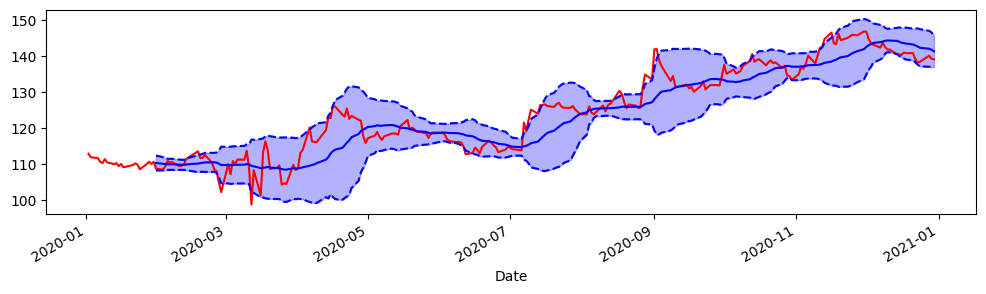

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    # 21 day rolling mean
    ma = df.rolling(window=21).mean()

    # 21 day rolling std
    dv = df.rolling(window=21).std()

    # rolling mean +- 2*std
    band_top = ma.Close + 2*dv.Close
    band_bottom = ma.Close - 2*dv.Close

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax,color='r')
    ma.Close.plot(ax=ax,color='b')
    band_top.plot(ax=ax,color='b',linestyle="--")
    band_bottom.plot(ax=ax,color='b',linestyle="--")
    ax.fill_between(ma.index, band_top, band_bottom, color='b', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - min_periods***

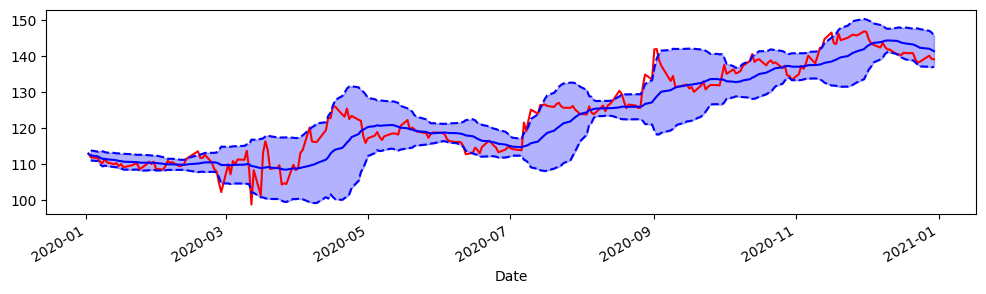

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    # 21 day rolling mean
    ma = df.rolling(window=21, min_periods=1).mean()

    # 21 day rolling std
    dv = df.rolling(window=21, min_periods=1).std()

    # rolling mean +- 2*std
    band_top = ma.Close + 2*dv.Close
    band_bottom = ma.Close - 2*dv.Close

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax,color='r')
    ma.Close.plot(ax=ax,color='b')
    band_top.plot(ax=ax,color='b',linestyle="--")
    band_bottom.plot(ax=ax,color='b',linestyle="--")
    ax.fill_between(ma.index, band_top, band_bottom, color='b', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

####***Section 2 Weighted Moving Average***

#####***Method - apply***

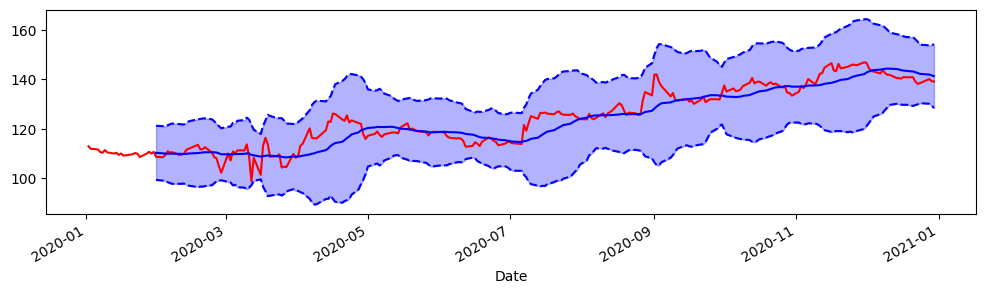

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    weight = np.array([0.9,0.9,0.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.1,1.1,1.1])

    # manually weighted mean
    ma = df.rolling(21).apply(lambda x: (weight*x).mean())

    # manually weighted std
    dv = df.rolling(21).apply(lambda x: (weight*x).std())

    # manually weighted mean +- 2*std
    band_top = ma.Close + 2*dv.Close
    band_bottom = ma.Close - 2*dv.Close

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax,color='r')
    ma.Close.plot(ax=ax,color='b')
    band_top.plot(ax=ax,color='b',linestyle="--")
    band_bottom.plot(ax=ax,color='b',linestyle="--")
    ax.fill_between(ma.index, band_top, band_bottom, color='b', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

####***Section 3 Exponential Moving Average***

#####***Method - ewm [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)***

$$\begin{array}{cccccccccc}
\text{df}&\text{.}&\text{ewm(}&\text{span=21}&\text{)}&\text{.}&\text{mean()}\\
&&&\uparrow&&&\uparrow\\
&&&\text{Span, Com, Halflife, Alpha}&&&\text{Method}\\
\end{array}$$

#####***Keyword - adjust***

`adjust=True` (default)
$$\begin{array}{lll}
y_t&=&\displaystyle\frac{x_t+(1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+\cdots+(1-\alpha)^tx_0}{1+(1-\alpha)+(1-\alpha)^2+\cdots+(1-\alpha)^t}
\end{array}$$

`adjust=False`
$$\begin{array}{lll}
y_0&=&x_0\\
y_t&=&y_{t-1}+\alpha(x_t-y_t)
\end{array}$$

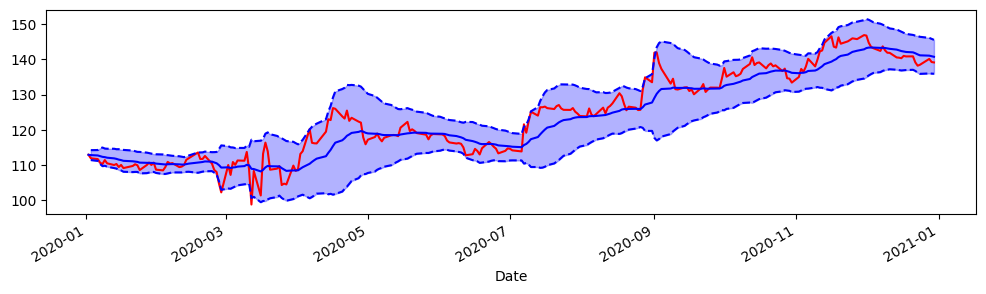

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    # exponentially weighted mean
    ma = df.ewm(span=21, adjust=False).mean()

    # exponentially weighted std
    dv = df.ewm(span=21, adjust=False).std()

    # exponentially weighted mean +- 2*std
    band_top = ma.Close + 2*dv.Close
    band_bottom = ma.Close - 2*dv.Close

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax,color='r')
    ma.Close.plot(ax=ax,color='b')
    band_top.plot(ax=ax,color='b',linestyle="--")
    band_bottom.plot(ax=ax,color='b',linestyle="--")
    ax.fill_between(ma.index, band_top, band_bottom, color='b', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - alpha, span, com, halflife***

$$
\displaystyle
\alpha
=\frac{1}{1+\text{com}}
=\frac{2}{1+\text{span}}
=1-\text{exp}\left(-\frac{\ln(2)}{\text{halflife}}\right)
$$

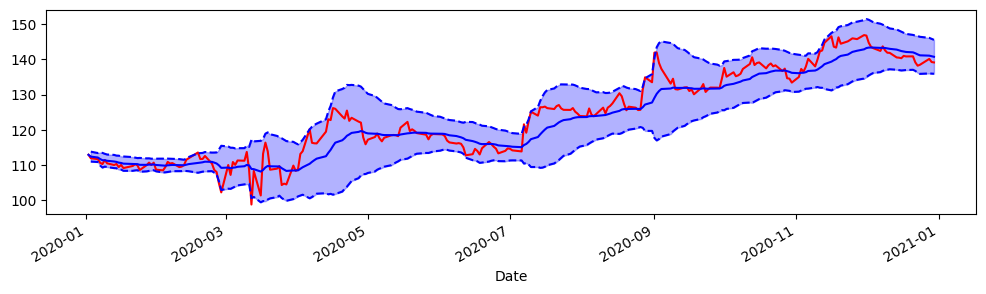

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    # exponentially weighted mean
    ma = df.ewm(span=21).mean()

    # exponentially weighted std
    dv = df.ewm(span=21).std()

    # exponentially weighted mean +- 2*std
    band_top = ma.Close + 2*dv.Close
    band_bottom = ma.Close - 2*dv.Close

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax,color='r')
    ma.Close.plot(ax=ax,color='b')
    band_top.plot(ax=ax,color='b',linestyle="--")
    band_bottom.plot(ax=ax,color='b',linestyle="--")
    ax.fill_between(ma.index, band_top, band_bottom, color='b', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - min_periods***

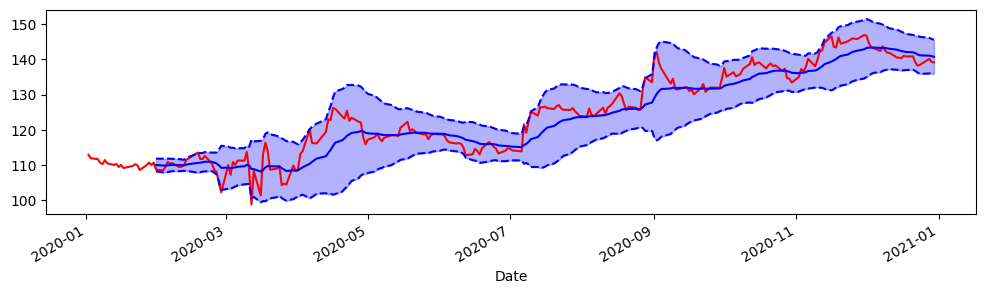

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df.drop(columns=['Volume','Dividends','Stock Splits'],inplace=True)

    # exponentially weighted mean
    ma = df.ewm(span=21, min_periods=21).mean()

    # exponentially weighted std
    dv = df.ewm(span=21, min_periods=21).std()

    # exponentially weighted mean +- 2*std
    band_top = ma.Close + 2*dv.Close
    band_bottom = ma.Close - 2*dv.Close

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax,color='r')
    ma.Close.plot(ax=ax,color='b')
    band_top.plot(ax=ax,color='b',linestyle="--")
    band_bottom.plot(ax=ax,color='b',linestyle="--")
    ax.fill_between(ma.index, band_top, band_bottom, color='b', alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

####***Section 4 Resample Method***

#####***Method - resample***

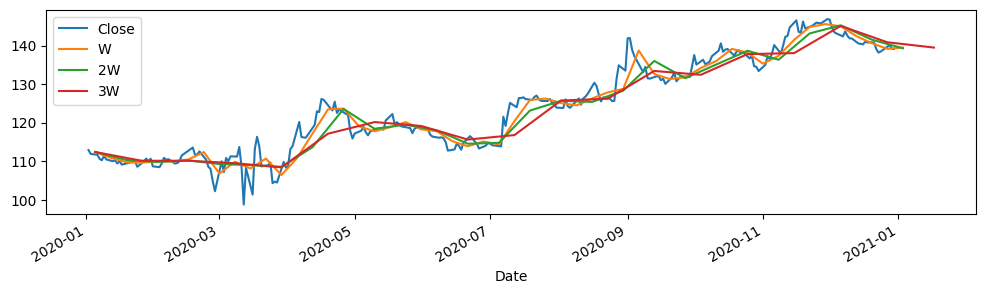

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)

    fig, ax = plt.subplots(figsize=(12,3))
    df.Close.plot(ax=ax)
    for rule in ['W','2W','3W']:
        dg = df.Close.resample(rule).mean()
        dg.plot(ax=ax,label=rule)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

####***Section 5 Daily Return***

#####***Method - shift***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    
    df = df[["Close"]]
    df['shift_1'] = df.Close.shift()
    df['shift_2'] = df.Close.shift(2)
    print(df.head())

if __name__ == "__main__":
    main()

                                Close     shift_1     shift_2
Date                                                         
2020-01-02 00:00:00-05:00  112.910889         NaN         NaN
2020-01-03 00:00:00-05:00  111.914116  112.910889         NaN
2020-01-06 00:00:00-05:00  111.686279  111.914116  112.910889
2020-01-07 00:00:00-05:00  110.651527  111.686279  111.914116
2020-01-08 00:00:00-05:00  110.271812  110.651527  111.686279


#####***Method - diff***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    
    df = df[["Close"]]
    df['diff_1'] = df.Close.diff()
    df['diff_2'] = df.Close.diff(2)
    print(df.head())

if __name__ == "__main__":
    main()

                                Close    diff_1    diff_2
Date                                                     
2020-01-02 00:00:00-05:00  112.910889       NaN       NaN
2020-01-03 00:00:00-05:00  111.914116 -0.996773       NaN
2020-01-06 00:00:00-05:00  111.686287 -0.227829 -1.224602
2020-01-07 00:00:00-05:00  110.651535 -1.034752 -1.262581
2020-01-08 00:00:00-05:00  110.271790 -0.379745 -1.414497


#####***Method - pct_change***

$$\begin{array}{cccccccc}
r_D&=&\frac{S_1}{S_0}-1\\
r_C&=&\log\frac{S_1}{S_0}&\approx&\frac{S_1}{S_0}-1&=&r_D\\
\end{array}$$

###***Chapter 9 How to combine Dataframe***

####***Section 1 Combining Two DBs***

#####***Comparioson of Various Methods***

- join method - Use index

- pd.merge - Use columns 

#####***Four Different Ways of Combination***

<img src='https://miro.medium.com/max/2100/1*9eH1_7VbTZPZd9jBiGIyNA.png' width=50%>

[Merging DataFrames with pandas](https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjMzZmY1YWYxMmQ3NjY2YzU4Zjk5NTZlNjVlNDZjOWMwMmVmOGU3NDIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NDIzNDI1MDIsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNjg1ODE3Mjk0MjkwMzcwMTYxMSIsImVtYWlsIjoic3VuZ2NodWx5b25zZWlAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJTdW5nY2h1bCBMZWUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2d1SkhTSnFFQmxmcDFqX3M1QWsya3A3ZkFEZGluQm8yR0NHOFU2Z2c9czk2LWMiLCJnaXZlbl9uYW1lIjoiU3VuZ2NodWwiLCJmYW1pbHlfbmFtZSI6IkxlZSIsImlhdCI6MTY0MjM0MjgwMiwiZXhwIjoxNjQyMzQ2NDAyLCJqdGkiOiJhNjVmMWUzOTExZWU4NzM2NmExNDJjZGNlMjYxOTYzYTY2NjBkMTZjIn0.f93vlxrt3rrlVXZglodxnf0Sd8GsRpnJntq4LSDRFdttguudh1PYJ1l3ivEFu8THJn_JM8f9W9kaE8wmLA61EsROIG5MEsmsZrBLx45-pR3Zx_1fVCUXPdA3oNnK0rFEiTArv3pHOgyBJH74T1JI4-nfmEJjKqPC-Cg2X_jPcNWULMPm-Nj88bG8o9MMfXsI183V_PNY1PlXqPSudPxH8YW1u5MaMQ7NEjdsGbMLiCHpGqq8xt4tgcJP4TLgMeSBTRo3iSyCAexlRoFW0A03pxvOsAnTewX53iskDhpx0fuDsBIZYpVEvURIcqgLKNxvh-0tlMPVEUNvIihZCT9-uw)

####***Section 2 Method - join [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)***

#####***Method - join***

In [ ]:
def download(ticker):
    return yf.Ticker(ticker).history(period="max")

def main():
    df = pd.DataFrame()
    tickers = ['META','AAPL','AMZN','NFLX','GOOG']
    for ticker in tickers:
        df_ = download(ticker).rename(columns={'Close' : ticker})[[ticker]]
        df = df.join(df_,how="outer")
    print(df.head(3),end="\n\n")
    print(df.tail(3))

if __name__ == "__main__":
    main()

                           META      AAPL  AMZN  NFLX  GOOG
Date                                                       
1980-12-12 00:00:00-05:00   NaN  0.099722   NaN   NaN   NaN
1980-12-15 00:00:00-05:00   NaN  0.094519   NaN   NaN   NaN
1980-12-16 00:00:00-05:00   NaN  0.087582   NaN   NaN   NaN

                                 META        AAPL        AMZN        NFLX  \
Date                                                                        
2023-05-03 00:00:00-04:00  237.029999  167.449997  103.650002  319.299988   
2023-05-04 00:00:00-04:00  233.520004  165.789993  104.000000  320.779999   
2023-05-05 00:00:00-04:00  232.779999  173.570007  105.660004  322.760010   

                                 GOOG  
Date                                   
2023-05-03 00:00:00-04:00  106.120003  
2023-05-04 00:00:00-04:00  105.209999  
2023-05-05 00:00:00-04:00  106.214996  


#####***Keyword - how***

<img src='https://miro.medium.com/max/2100/1*9eH1_7VbTZPZd9jBiGIyNA.png' width=50%>

[Merging DataFrames with pandas](https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjMzZmY1YWYxMmQ3NjY2YzU4Zjk5NTZlNjVlNDZjOWMwMmVmOGU3NDIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NDIzNDI1MDIsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNjg1ODE3Mjk0MjkwMzcwMTYxMSIsImVtYWlsIjoic3VuZ2NodWx5b25zZWlAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJTdW5nY2h1bCBMZWUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2d1SkhTSnFFQmxmcDFqX3M1QWsya3A3ZkFEZGluQm8yR0NHOFU2Z2c9czk2LWMiLCJnaXZlbl9uYW1lIjoiU3VuZ2NodWwiLCJmYW1pbHlfbmFtZSI6IkxlZSIsImlhdCI6MTY0MjM0MjgwMiwiZXhwIjoxNjQyMzQ2NDAyLCJqdGkiOiJhNjVmMWUzOTExZWU4NzM2NmExNDJjZGNlMjYxOTYzYTY2NjBkMTZjIn0.f93vlxrt3rrlVXZglodxnf0Sd8GsRpnJntq4LSDRFdttguudh1PYJ1l3ivEFu8THJn_JM8f9W9kaE8wmLA61EsROIG5MEsmsZrBLx45-pR3Zx_1fVCUXPdA3oNnK0rFEiTArv3pHOgyBJH74T1JI4-nfmEJjKqPC-Cg2X_jPcNWULMPm-Nj88bG8o9MMfXsI183V_PNY1PlXqPSudPxH8YW1u5MaMQ7NEjdsGbMLiCHpGqq8xt4tgcJP4TLgMeSBTRo3iSyCAexlRoFW0A03pxvOsAnTewX53iskDhpx0fuDsBIZYpVEvURIcqgLKNxvh-0tlMPVEUNvIihZCT9-uw)

In [ ]:
# Keyword - how='left' (default)
def main():
    df = pd.DataFrame()
    tickers = ['META','AAPL','AMZN','NFLX','GOOG']
    for ticker in tickers:
        df_ = download(ticker).rename(columns={'Close' : ticker})[[ticker]]
        df = df.join(df_, how='left')
    print(df.head())

if __name__ == "__main__":
    main()

In [ ]:
# Keyword - how='right'
def main():
    df = pd.DataFrame()
    tickers = ['META','AAPL','AMZN','NFLX','GOOG']
    for ticker in tickers:
        df_ = download(ticker).rename(columns={'Close' : ticker})[[ticker]]
        df = df.join(df_, how='right')
    print(df.head())

if __name__ == "__main__":
    main()

In [ ]:
# Keyword - how='inner'
def main():
    df = pd.DataFrame()
    tickers = ['META','AAPL','AMZN','NFLX','GOOG']
    for ticker in tickers:
        df_ = download(ticker).rename(columns={'Close' : ticker})[[ticker]]
        df = df.join(df_, how='inner')
    print(df.head())

if __name__ == "__main__":
    main()

In [ ]:
# Keyword - how='outer'
def main():
    df = pd.DataFrame()
    tickers = ['META','AAPL','AMZN','NFLX','GOOG']
    for ticker in tickers:
        df_ = download(ticker).rename(columns={'Close' : ticker})[[ticker]]
        df = df.join(df_, how='outer')
    print(df.head())

if __name__ == "__main__":
    main()

####***Section 3 Function - pd.merge [eng](https://www.youtube.com/watch?v=h4hOPGo4UVU&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=9) [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)***

#####***Keyword - on***

In [ ]:
def main():
    df1 = pd.DataFrame({"city":["NY","SF","LA"],"temperature":[21,14,35]})
    print(df1,end="\n\n")

    df2 = pd.DataFrame({"city":["SF","NY","ICN"],"temperature":[21,14,35],"humidity":[65,68,75]})
    print(df2,end="\n\n")

    df = pd.merge(df1, df2, on='city')
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

  city  temperature
0   NY           21
1   SF           14
2   LA           35

  city  temperature  humidity
0   SF           21        65
1   NY           14        68
2  ICN           35        75

  city  temperature_x  temperature_y  humidity
0   NY             21             14        68
1   SF             14             21        65



#####***Keyword - left_on and right_on***

In [ ]:
def main():
    df1 = pd.DataFrame({"city":["NY","SF","LA"],"temperature":[21,14,35]})
    print(df1,end="\n\n")

    df2 = pd.DataFrame({"CITY":["SF","NY","ICN"],"temperature":[21,14,35],"humidity":[65,68,75]})
    print(df2,end="\n\n")

    df = pd.merge(df1, df2, left_on='city', right_on='CITY')
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

#####***Keyword - how***

In [ ]:
def main():
    df1 = pd.DataFrame({"city":["NY","SF","LA"],"temperature":[21,14,35]})
    print(df1,end="\n\n")

    df2 = pd.DataFrame({"city":["SF","NY","ICN"],"temperature":[21,14,35],"humidity":[65,68,75]})
    print(df2,end="\n\n")

    df = pd.merge(df1, df2, on='city', how='outer')
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

#####***Keyword - suffixes***

In [ ]:
def main():
    df1 = pd.DataFrame({"city":["NY","SF","LA"],"temperature":[21,14,35]})
    print(df1,end="\n\n")

    df2 = pd.DataFrame({"city":["SF","NY","ICN"],"temperature":[21,14,35],"humidity":[65,68,75]})
    print(df2,end="\n\n")

    df = pd.merge(df1, df2, on='city', how='outer', suffixes=['_left','_right'])
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

#####***Keyword - indicator***

In [ ]:
def main():
    df1 = pd.DataFrame({"city":["NY","SF","LA"],"temperature":[21,14,35]})
    print(df1,end="\n\n")

    df2 = pd.DataFrame({"city":["SF","NY","ICN"],"temperature":[21,14,35],"humidity":[65,68,75]})
    print(df2,end="\n\n")

    df = pd.merge(df1, df2, on='city', how='outer', suffixes=['_left','_right'], indicator=True)
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

  city  temperature
0   NY           21
1   SF           14
2   LA           35

  city  temperature  humidity
0   SF           21        65
1   NY           14        68
2  ICN           35        75

  city  temperature_left  temperature_right  humidity      _merge
0   NY              21.0               14.0      68.0        both
1   SF              14.0               21.0      65.0        both
2   LA              35.0                NaN       NaN   left_only
3  ICN               NaN               35.0      75.0  right_only



####***Section 4 Function - pd.concat [eng](https://www.youtube.com/watch?v=WGOEFok1szA&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=8) [doc](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)***

#####***Function - pd.concat***

<img src="https://miro.medium.com/v2/resize:fit:1400/1*NLnoAF5uOSBC2Y7IuzfM_Q.png">

Sorce [Pandas_Concat_1023](https://www.kaggle.com/code/marufnthewindows/pandas-concat-1023/notebook)



In [ ]:
def main():
    df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
    print(df1,end="\n\n")

    df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
    print(df2,end="\n\n")

    df = pd.concat([df1, df2])
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

   A  B
0  1  2
1  3  4

   A  B
0  5  6
1  7  8

   A  B
0  1  2
1  3  4
0  5  6
1  7  8



#####***Keyword - ignore_index***

- ignore_index = Falue (default)
- ignore_index = True : If True, do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1.

In [ ]:
def main():
    df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
    print(df1,end="\n\n")

    df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
    print(df2,end="\n\n")

    df = pd.concat([df1, df2], ignore_index=True)
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

   A  B
0  1  2
1  3  4

   A  B
0  5  6
1  7  8

   A  B
0  1  2
1  3  4
2  5  6
3  7  8



#####***Keyword - axis***

- axis = 0 (default) : append top-down(axis=0) direction using index
- axis = 1 : append left-right(axis=1) direction using columns

In [ ]:
def main():
    df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
    print(df1,end="\n\n")

    df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
    print(df2,end="\n\n")

    df = pd.concat([df1, df2], axis=1)
    print(df,end="\n\n")

if __name__ == "__main__":
    main()

   A  B
0  1  2
1  3  4

   A  B
0  5  6
1  7  8

   A  B  A  B
0  1  2  5  6
1  3  4  7  8



####***Section 5 Method - append***

#####***Method - append***

```
FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
```

In [ ]:
def main():
    df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
    print(df,end="\n\n")

    dg = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
    print(dg,end="\n\n")

    dh = df.append(dg)
    print(dh,end="\n\n")

if __name__ == "__main__":
    main()

   A  B
0  1  2
1  3  4

   A  B
0  5  6
1  7  8

   A  B
0  1  2
1  3  4
0  5  6
1  7  8



<ipython-input-12-93ab30251668>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dh = df.append(dg)


#####***Keyword - ignore_index***

In [ ]:
def main():
    df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
    print(df,end="\n\n")

    dg = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
    print(dg,end="\n\n")

    dh = df.append(dg, ignore_index=True)
    print(dh,end="\n\n")

if __name__ == "__main__":
    main()

   A  B
0  1  2
1  3  4

   A  B
0  5  6
1  7  8

   A  B
0  1  2
1  3  4
2  5  6
3  7  8



<ipython-input-13-e7ec207e049c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dh = df.append(dg, ignore_index=True)


###***Chapter 10 Indexing and Slicing***

####***Section 1 Indexing and Slicing***

$$\begin{array}{lllll}
\text{Exlicit Indexing and Slicing - loc}&\text{End point inclusive}\\
\text{Implicit Indexing and Slicing - iloc}&\text{End point exclusive as usual}\\
\end{array}$$

####***Section 2 Exlicit Indexing and Slicing - loc***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) 
    print(df.columns)
    print( df.loc[5:10, "PassengerId":"Pclass"] )

if __name__ == "__main__":
    main()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
    PassengerId  Survived  Pclass
5             6         0       3
6             7         0       1
7             8         0       3
8             9         1       3
9            10         1       2
10           11         1       3


####***Section 3 Implicit Indexing and Slicing - iloc***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url) 
    print(df.columns)
    print( df.iloc[5:10, 0:2] )

if __name__ == "__main__":
    main()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived
5            6         0
6            7         0
7            8         0
8            9         1
9           10         1


####***Section 4 Shape Change after Indexing and Slicing***

#####***Numpy Array - Shape Change after Indexing and Slicing***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    x = df.values
    print(f"{x.shape = }")
    print(f"{x[1:2,2:3].shape = }")
    print(f"{x[1:2,2].shape = }")
    print(f"{x[1,2].shape = }")

if __name__ == "__main__":
    main()

#####***Pandas DataFrame - Shape Change after Indexing and Slicing***

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(f"{df.shape = }")
    print(f"{df.iloc[1:2,2:3].shape = }")
    print(f"{df.iloc[1:2,2].shape = }")
    print(f"{df.iloc[1,2].shape = }")
    print(f"{df[['Close']].shape = }")
    print(f"{df['Close'].shape = }")

if __name__ == "__main__":
    main()

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    df = df[["Close"]]

    df['Return'] = df.Close.pct_change()
    df['D_Return'] = (df.Close / df.Close.shift(1)) - 1
    df['C_Return'] = np.log(df.Close / df.Close.shift(1))
    print(df.head())

if __name__ == "__main__":
    main()

                                Close    Return  D_Return  C_Return
Date                                                               
2020-01-02 00:00:00-05:00  112.910889       NaN       NaN       NaN
2020-01-03 00:00:00-05:00  111.914101 -0.008828 -0.008828 -0.008867
2020-01-06 00:00:00-05:00  111.686272 -0.002036 -0.002036 -0.002038
2020-01-07 00:00:00-05:00  110.651527 -0.009265 -0.009265 -0.009308
2020-01-08 00:00:00-05:00  110.271812 -0.003432 -0.003432 -0.003438


###***Chapter 11 Boolean Masking***

#####***&, not and***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    std = df.x.std()
    n = len(df.x)
    n1 = len(df.x[(mean-std<df.x) & (df.x<mean+std)])
    n2 = len(df.x[(mean-2*std<df.x) & (df.x<mean+2*std)])
    n3 = len(df.x[(mean-3*std<df.x) & (df.x<mean+3*std)])
    print(n1/n*100) # 68
    print(n2/n*100) # 95
    print(n3/n*100) # 99.7

if __name__ == "__main__":
    main()

72.69
94.998
98.662


#####***|, not or***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv'
    df = pd.read_csv(url)
    mean = df.x.mean()
    std = df.x.std()
    n = len(df.x)
    n1 = len(df.x[(mean-std>df.x) | (df.x>mean+std)])
    n2 = len(df.x[(mean-2*std>df.x) | (df.x>mean+2*std)])
    n3 = len(df.x[(mean-3*std>df.x) | (df.x>mean+3*std)])
    print(n1/n*100) # 100 - 68 = 32
    print(n2/n*100) # 100 - 95 = 5
    print(n3/n*100) # 100 - 99.7 = 0.03

if __name__ == "__main__":
    main()

27.310000000000002
5.002
1.3379999999999999


###***Chapter 12 How To Handle Missing Values [eng](https://www.youtube.com/watch?v=EaGbS7eWSs0)***

####***Section 1 Method - fillna [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)***

#####***Fill NA with One Single Value***

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna(30)
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04         30.0        9.0   Sunny
2017-01-05         28.0       30.0    Snow
2017-01-06         30.0        7.0      30
2017-01-07         32.0       30.0    Rain
2017-01-08         30.0       30.0   Sunny
2017-01-09         30.0       30.0      30
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


#####***Fill NA with Different Values for Different Columns***

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna({
        "temperature" : 30,
        "windspeed" : df.windspeed.mean(),
        "event" : "No Event",
        })
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed     event
day                                         
2017-01-01         32.0        6.0      Rain
2017-01-04         30.0        9.0     Sunny
2017-01-05         28.0        8.4      Snow
2017-01-06         30.0        7.0  No Event
2017-01-07         32.0        8.4      Rain
2017-01-08         30.0        8.4     Sunny
2017-01-09         30.0        8.4  No Event
2017-01-10         34.0        8.0    Cloudy
2017-01-11         40.0       12.0     Sunny



#####***Keyword - method***

    pad / ffill: propagate last valid observation forward to next valid 
    
    backfill / bfill: use next valid observation to fill gap

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna(method='ffill')
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04         32.0        9.0   Sunny
2017-01-05         28.0        9.0    Snow
2017-01-06         28.0        7.0    Snow
2017-01-07         32.0        7.0    Rain
2017-01-08         32.0        7.0   Sunny
2017-01-09         32.0        7.0   Sunny
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny



In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna(method='bfill')
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04         28.0        9.0   Sunny
2017-01-05         28.0        7.0    Snow
2017-01-06         32.0        7.0    Rain
2017-01-07         32.0        8.0    Rain
2017-01-08         34.0        8.0   Sunny
2017-01-09         34.0        8.0  Cloudy
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny



#####***Keyword - axis***

***axis : {0 or ‘index’, 1 or ‘columns’}***

Axis along which to fill missing values. For Series this parameter is unused and defaults to 0.

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna(method='ffill',axis=0)
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04         32.0        9.0   Sunny
2017-01-05         28.0        9.0    Snow
2017-01-06         28.0        7.0    Snow
2017-01-07         32.0        7.0    Rain
2017-01-08         32.0        7.0   Sunny
2017-01-09         32.0        7.0   Sunny
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny



In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna(method='ffill',axis=1)
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

           temperature windspeed   event
day                                     
2017-01-01        32.0       6.0    Rain
2017-01-04         NaN       9.0   Sunny
2017-01-05        28.0      28.0    Snow
2017-01-06         NaN       7.0     7.0
2017-01-07        32.0      32.0    Rain
2017-01-08         NaN       NaN   Sunny
2017-01-09         NaN       NaN     NaN
2017-01-10        34.0       8.0  Cloudy
2017-01-11        40.0      12.0   Sunny



#####***Keyword - limit***

If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill. 

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.fillna(method='ffill',limit=1)
    print(dg,end="\n\n")

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04         32.0        9.0   Sunny
2017-01-05         28.0        9.0    Snow
2017-01-06         28.0        7.0    Snow
2017-01-07         32.0        7.0    Rain
2017-01-08         32.0        NaN   Sunny
2017-01-09          NaN        NaN   Sunny
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny



####***Section 2 Method - interpolate [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)***

#####***Linear Interpolation is Default***

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.interpolate()
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01    32.000000       6.00    Rain
2017-01-04    30.000000       9.00   Sunny
2017-01-05    28.000000       8.00    Snow
2017-01-06    30.000000       7.00     NaN
2017-01-07    32.000000       7.25    Rain
2017-01-08    32.666667       7.50   Sunny
2017-01-09    33.333333       7.75     NaN
2017-01-10    34.000000       8.00  Cloudy
2017-01-11    40.000000      12.00   Sunny


#####***Keyword - method***

    ‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

    ‘time’: Works on daily and higher resolution data to interpolate given length of interval.

    ‘index’, ‘values’: use the actual numerical values of the index.

    ‘pad’: Fill in NaNs using existing values.

    ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

    ‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.

    ‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.interpolate(method="time")
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01    32.000000       6.00    Rain
2017-01-04    29.000000       9.00   Sunny
2017-01-05    28.000000       8.00    Snow
2017-01-06    30.000000       7.00     NaN
2017-01-07    32.000000       7.25    Rain
2017-01-08    32.666667       7.50   Sunny
2017-01-09    33.333333       7.75     NaN
2017-01-10    34.000000       8.00  Cloudy
2017-01-11    40.000000      12.00   Sunny


####***Section 3 Method - dropna [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)***

#####***Method - dropna***

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.dropna()
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


#####***Keyword - how***

    ‘any’ (default) : If any NA values are present, drop that row or column.

    ‘all’ : If all values are NA, drop that row or column.

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.dropna(how="all")
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


#####***Keyword - thresh***


    Require that many non-NA values. Cannot be combined with how.

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.dropna(thresh=2)
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-07         32.0        NaN    Rain
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


####***Section 4 Method - replace [eng](https://www.youtube.com/watch?v=XOxABiMhG2U&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=6)***

In [ ]:
import pandas as pd

def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dg = df.replace(to_replace=np.nan, value=2508800.0)
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed      event
day                                          
2017-01-01         32.0        6.0       Rain
2017-01-04    2508800.0        9.0      Sunny
2017-01-05         28.0  2508800.0       Snow
2017-01-06    2508800.0        7.0  2508800.0
2017-01-07         32.0  2508800.0       Rain
2017-01-08    2508800.0  2508800.0      Sunny
2017-01-09    2508800.0  2508800.0  2508800.0
2017-01-10         34.0        8.0     Cloudy
2017-01-11         40.0       12.0      Sunny


###***Chapter 13 Working with Database [eng](https://www.youtube.com/watch?v=M-4EpNdlSuY&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=14)***

Handle Large Datasets In Pandas [eng](https://www.youtube.com/watch?v=HNE0qHJ9A9o&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=15)

#***PART IV Index***

###***Chapter 14 Index***

####***Section 1 How to set Index***

#####***DataFrame Method - set_index***

In [ ]:
# without set_index method
def main():
    india = pd.DataFrame({
        "city" : ["mumbai", "delhi"],
        "temperature" : [32, 45],
        "humidity" : [70, 60],
    })
    print(india)

if __name__ == "__main__":
    main()

     city  temperature  humidity
0  mumbai           32        70
1   delhi           45        60


In [ ]:
# with set_index method
def main():
    india = pd.DataFrame({
        "city" : ["mumbai", "delhi"],
        "temperature" : [32, 45],
        "humidity" : [70, 60],
    }).set_index('city')
    print(india)

if __name__ == "__main__":
    main()

        temperature  humidity
city                         
mumbai           32        70
delhi            45        60


#####***DataFrame Method - reset_index***

In [ ]:
def main():
    major = ["A","B","C","D","E","F"]
    n_male = [825,560,325,417,191,373]
    p_male = [0.62,0.63,0.37,0.33,0.28,0.06]
    n_female = [108,25,593,375,393,341]
    p_female = [0.82,0.68,0.34,0.35,0.24,0.07]
    data = {"major":major,"n_male":n_male,"p_male":p_male,"n_female":n_female,"p_female":p_female}
    df = pd.DataFrame(data).set_index("major")
    print(df.head(3),end="\n\n")

    df.reset_index(inplace=True)
    print(df.head(3),end="\n\n")

if __name__ == "__main__":
    main()

       n_male  p_male  n_female  p_female
major                                    
A         825    0.62       108      0.82
B         560    0.63        25      0.68
C         325    0.37       593      0.34

  major  n_male  p_male  n_female  p_female
0     A     825    0.62       108      0.82
1     B     560    0.63        25      0.68
2     C     325    0.37       593      0.34



#####***DataFrame Method - reindex***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/5_handling_missing_data_fillna_dropna_interpolate/weather_data.csv"
    df = pd.read_csv(url,index_col='day',parse_dates=True)
    print(df,end="\n\n")

    dt = pd.date_range("01-01-2017","01-11-2017")
    idx = pd.DatetimeIndex(dt)
    dg = df.reindex(idx)
    print(dg)

if __name__ == "__main__":
    main()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny

            temperature  windspeed   event
2017-01-01         32.0        6.0    Rain
2017-01-02          NaN        NaN     NaN
2017-01-03          NaN        NaN     NaN
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


#####***pd.read_csv Keyword - index_col***

In [ ]:
def main():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') 
    print(df.head())

if __name__ == "__main__":
    main()

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

####***Section 2 How to make Index***

#####***Function - pd.date_range [doc](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)***

$$y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$$
where $\varepsilon_t \sim N(0,1)$

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')



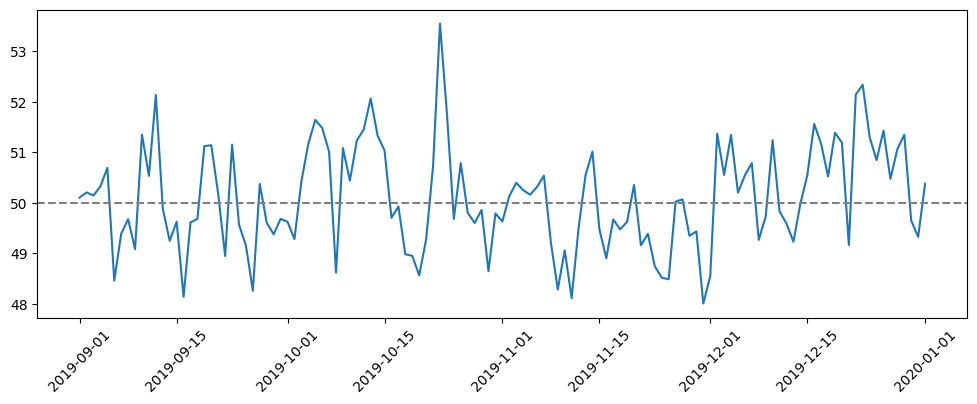

In [ ]:
def main():
    index = pd.date_range(start='2019-09-01', end='2020-01-01')
    print(index, end="\n\n")

    errors = np.random.normal(size=(len(index)+2,))

    mu = 50
    data = []
    for t in range(2,len(index)+2):
        data.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

    series = pd.Series(data, index=index)
    print(series.index, end="\n\n")

    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(series)
    ax.axhline(mu, linestyle='--', color='grey')
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    plt.show()

if __name__ == "__main__":
    main()

####***Section 3 Hierarchical indexing***

#####***Hierarchical Indexing***

In [ ]:
def main():
    india = pd.DataFrame({
        "city" : ["mumbai", "delhi"],
        "temperature" : [32, 45],
        "humidity" : [70, 60],
    }).set_index('city')
    print(india,end="\n\n")

    us = pd.DataFrame({
        "city" : ["new york", "chicago"],
        "temperature" : [21, 14],
        "humidity" : [68, 65],
    }).set_index('city')
    print(us,end="\n\n")

    df = pd.concat([india, us], keys=["india", "us"])
    print(df,end="\n\n")

    print(df.loc["us"],end="\n\n")

    print(df.loc["us"].loc['new york'],end="\n\n") # chained indexing

    print(df.loc[("us",'new york')],end="\n\n") # not chained indexing

if __name__ == "__main__":
    main()

        temperature  humidity
city                         
mumbai           32        70
delhi            45        60

          temperature  humidity
city                           
new york           21        68
chicago            14        65

                temperature  humidity
      city                           
india mumbai             32        70
      delhi              45        60
us    new york           21        68
      chicago            14        65

          temperature  humidity
city                           
new york           21        68
chicago            14        65

temperature    21
humidity       68
Name: new york, dtype: int64

temperature    21
humidity       68
Name: (us, new york), dtype: int64



#####***Don't Use Chained Indexing***

df['one'] selects the first level of the columns and returns a DataFrame that is singly-indexed. Then another Python operation df_with_one['second'] selects the series indexed by 'second'. This is indicated by the variable df_with_one because pandas sees these operations as separate events. e.g. separate calls to __getitem__, so it has to treat them as linear operations, they happen one after another.

[doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

Contrast this to df.loc[:,('one','second')] which passes a nested tuple of (slice(None),('one','second')) to a single call to __getitem__. This allows pandas to deal with this as a single entity. Furthermore this order of operations can be significantly faster, and allows one to index both axes if so desired.

[doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

Assigning to the product of chained indexing has inherently unpredictable results. 

[doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [ ]:
def main():
    df = pd.DataFrame([list('abcd'),
                    list('efgh'),
                    list('ijkl'),
                    list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'],
                                                        ['first', 'second']]))
    print(df,end="\n\n") 

    print(df['one']['second'],end="\n\n") # chained indexing

    print(df.loc[:, ('one', 'second')],end="\n\n")  # not chained indexing

    df['one']['second'][3] = 'Hi'
    print(df,end="\n\n") 

    df.loc[:, ('one', 'second')][3] = 'Hi'
    print(df,end="\n\n") 

if __name__ == "__main__":
    main()

###***Chapter 15 Index Attribute***

#####***dtype***

In [ ]:
def main():
    data = [1,2,3,2]
    index = pd.date_range(start='2019-09-01', end='2019-09-04')
    df = pd.Series(data, index=index)
    print(f"{df.index = }")
    print(f"{df.index.dtype = }")

if __name__ == "__main__":
    main()

df.index = DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04'], dtype='datetime64[ns]', freq='D')
df.index.dtype = dtype('<M8[ns]')


#####***freq***

In [ ]:
def main():
    data = [1,2,3,2]
    index = pd.date_range(start='2019-09-01', end='2019-09-04')
    df = pd.Series(data, index=index)
    print(f"{df.index = }")
    print(f"{df.index.freq = }")

if __name__ == "__main__":
    main()

df.index = DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04'], dtype='datetime64[ns]', freq='D')
df.index.freq = <Day>


###***Chapter 16 Index Methods and Related Functions***

#####***Buit-In Function - pd.to_datetime***

In [ ]:
def main():
    data = [32, 35, 28]
    index = ['1/1/2017', '1/2/2017', '1/3/2017']
    df = pd.Series(data, index=index)
    print(f"{df.index[0] = }, {type(df.index[0]) = }")

    df.index = pd.to_datetime(df.index) 
    print(f"{df.index[0] = }, {type(df.index[0]) = }")
    
if __name__ == "__main__":
    main()

df.index[0] = '1/1/2017', type(df.index[0]) = <class 'str'>
df.index[0] = Timestamp('2017-01-01 00:00:00'), type(df.index[0]) = <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']

    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}
    df = pd.DataFrame(data)
    df.set_index('day', inplace=True) 
    print(f"{df.index[0] = }, {type(df.index[0]) = }")

    df.index = pd.to_datetime(df.index) 
    print(f"{df.index[0] = }, {type(df.index[0]) = }")
    
if __name__ == "__main__":
    main()

df.index[0] = '1/1/2017', type(df.index[0]) = <class 'str'>
df.index[0] = Timestamp('2017-01-01 00:00:00'), type(df.index[0]) = <class 'pandas._libs.tslibs.timestamps.Timestamp'>


###***Chapter 17 How to Parse***

####***Section Parse Columns***

#####***pd.read_csv Keyword - parse_dates***

To parse columns, provide a list of columns to parse to parse_dates.

In [ ]:
from datetime import datetime

def main():
    # need to parse
    url = 'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv'
    df = pd.read_csv(url)
    print(df.head(3))
    print(f"{type(df.Bill_Date[0]) = }", end="\n\n")

    # parse columns
    df = pd.read_csv(url, parse_dates=['Bill_Date'])
    print(df.head(3))
    print(f"{type(df.Bill_Date[0]) = }", end="\n\n")

if __name__ == "__main__":
    main()

  Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  1/1/2016      365    1423.5         219.0         247.73            31
1  2/1/2016      292    1138.8         175.2         234.11            31
2  3/1/2016      130     507.0          78.0         123.85            29
type(df.Bill_Date[0]) = <class 'str'>

   Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0 2016-01-01      365    1423.5         219.0         247.73            31
1 2016-02-01      292    1138.8         175.2         234.11            31
2 2016-03-01      130     507.0          78.0         123.85            29
type(df.Bill_Date[0]) = <class 'pandas._libs.tslibs.timestamps.Timestamp'>



#####***pd.read_csv Keyword - date_parser***

date_parser specifies how to parse date from string using datetime.datetime.strptime (strptime short for string parse time)

In [ ]:
from datetime import datetime

def main():
    # need to parse
    url = 'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv'
    df = pd.read_csv(url)
    print(df.head(3))
    print(f"{type(df.Bill_Date[0]) = }", end="\n\n")

    # parse columns
    date_parser = lambda x: datetime.strptime(x, '%m/%d/%Y')
    df = pd.read_csv(url, parse_dates=['Bill_Date'], date_parser=date_parser)
    print(df.head(3))
    print(f"{type(df.Bill_Date[0]) = }", end="\n\n")

if __name__ == "__main__":
    main()

  Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  1/1/2016      365    1423.5         219.0         247.73            31
1  2/1/2016      292    1138.8         175.2         234.11            31
2  3/1/2016      130     507.0          78.0         123.85            29
type(df.Bill_Date[0]) = <class 'str'>

   Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0 2016-01-01      365    1423.5         219.0         247.73            31
1 2016-02-01      292    1138.8         175.2         234.11            31
2 2016-03-01      130     507.0          78.0         123.85            29
type(df.Bill_Date[0]) = <class 'pandas._libs.tslibs.timestamps.Timestamp'>



####***Section Parse Index***

#####***pd.read_csv Keyword - parse_dates***

To parse index, provide True to parse_dates.

In [ ]:
import pandas as pd
from datetime import datetime

def main():
    # need to parse
    url = 'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv'
    df = pd.read_csv(url)
    print(df.head(3))
    print(f"{type(df.Bill_Date[0]) = }", end="\n\n")

    # parse index
    df = pd.read_csv(url, index_col="Bill_Date", parse_dates=True)
    print(df.head(3))
    print(f"{type(df.index[0]) = }", end="\n\n")

if __name__ == "__main__":
    main()

  Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  1/1/2016      365    1423.5         219.0         247.73            31
1  2/1/2016      292    1138.8         175.2         234.11            31
2  3/1/2016      130     507.0          78.0         123.85            29
type(df.Bill_Date[0]) = <class 'str'>

            On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
Bill_Date                                                               
2016-01-01      365    1423.5         219.0         247.73            31
2016-02-01      292    1138.8         175.2         234.11            31
2016-03-01      130     507.0          78.0         123.85            29
type(df.index[0]) = <class 'pandas._libs.tslibs.timestamps.Timestamp'>



#####***pd.read_csv Keyword - date_parser***

date_parser specifies how to parse date from string using datetime.datetime.strptime (strptime short for string parse time)

In [ ]:
import pandas as pd
from datetime import datetime

def main():
    # need to parse
    url = 'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv'
    df = pd.read_csv(url)
    print(df.head(3))
    print(f"{type(df.Bill_Date[0]) = }", end="\n\n")

    # parse index
    date_parser = lambda x: datetime.strptime(x, '%m/%d/%Y')
    df = pd.read_csv(url, index_col="Bill_Date", parse_dates=True, date_parser=date_parser)
    print(df.head(3))
    print(f"{type(df.index[0]) = }", end="\n\n")

if __name__ == "__main__":
    main()

  Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  1/1/2016      365    1423.5         219.0         247.73            31
1  2/1/2016      292    1138.8         175.2         234.11            31
2  3/1/2016      130     507.0          78.0         123.85            29
type(df.Bill_Date[0]) = <class 'str'>

            On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
Bill_Date                                                               
2016-01-01      365    1423.5         219.0         247.73            31
2016-02-01      292    1138.8         175.2         234.11            31
2016-03-01      130     507.0          78.0         123.85            29
type(df.index[0]) = <class 'pandas._libs.tslibs.timestamps.Timestamp'>



#***PART V Columns***

###***Chapter 18 Columns*** 

####***Section 1 How to set Columns***

#####***Dataframe Attribute - columns***

In [ ]:
def main():
    # original
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    # modify df.columns
    df.columns = ['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']
    print(df.head(3))

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00


#####***Dataframe Method - rename [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)***

In [ ]:
def main():
    # original
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    # modify df.columns
    mapper = {'Colors Reported' : 'Colors_Reported', 'Shape Reported' : 'Shape_Reported'}
    df = df.rename(columns=mapper) # <--- both are equivalent
    #df = df.rename(mapper=mapper,axis=1) # <--- both are equivalent
    print(df.head(3))

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00


#####***Series str Method - replace***

In [ ]:
def main():
    # original
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    # modify df.columns
    df = pd.read_csv('http://bit.ly/uforeports')
    # print(type(df.columns)) # pandas.core.indexes.base.Index
    # print(type(df.columns.str)) # pandas.core.strings.StringMethods
    # print(type(df.columns.str.replace)) # method
    df.columns = df.columns.str.replace(' ', '_')
    print(df.head(3))

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00


#####***pd.read_csv Keyword - names***

In [ ]:
def main():
    # original
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    names = ['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']

    # modify df.columns
    # using names=names, df.columns has been changed as we wish
    # however, the original header remains as the 0-th row
    df = pd.read_csv('http://bit.ly/uforeports', names=names)
    print(df.head(3), end="\n\n")

    # modify df.columns
    # using names=names, df.columns has been changed as we wish
    # by setting hearder=0, the original header skipped
    df = pd.read_csv('http://bit.ly/uforeports', names=names, header=0)
    print(df.head(3), end="\n\n")

    # modify df.columns
    # using names=names, df.columns has been changed as we wish
    # by setting skiprows=1, the original header skipped
    df = pd.read_csv('http://bit.ly/uforeports', names=names, skiprows=1)
    print(df.head(3), end="\n\n")

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City  Colors_Reported  Shape_Reported  State             Time
0         City  Colors Reported  Shape Reported  State             Time
1       Ithaca              NaN        TRIANGLE     NY   6/1/1930 22:00
2  Willingboro              NaN           OTHER     NJ  6/30/1930 20:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro     

####***Section 4 How to rename Columns [eng](https://www.youtube.com/watch?v=0uBirYFhizE&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=5)***

#####***pd.read_csv Keyword - names***

In [ ]:
def main():
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    names = ['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']
    df = pd.read_csv('http://bit.ly/uforeports', names=names)
    print(df.head(3), end="\n\n")

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City  Colors_Reported  Shape_Reported  State             Time
0         City  Colors Reported  Shape Reported  State             Time
1       Ithaca              NaN        TRIANGLE     NY   6/1/1930 22:00
2  Willingboro              NaN           OTHER     NJ  6/30/1930 20:00



#####***DataFrame Attribute - columns***

In [ ]:
def main():
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    df.columns = ['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']
    print(df.head(3), end="\n\n")

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00



#####***DataFrame Method - rename***

In [ ]:
def main():
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    columns = {
        'Colors Reported' : 'Colors_Reported', 
        'Shape Reported' : 'Shape_Reported'
        }
    df.rename(columns=columns,inplace=True)
    print(df.head(3), end="\n\n")

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00



#####***DataFrame String Method - replace***

In [ ]:
def main():
    df = pd.read_csv('http://bit.ly/uforeports')
    print(df.head(3), end="\n\n")

    df.columns = df.columns.str.replace(' ', '_')
    print(df.head(3), end="\n\n")

if __name__ == "__main__":
    main()

          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00

          City Colors_Reported Shape_Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00



###***Chapter 19 Columns Attribute***

#####***Columns Attribute - name***

In [ ]:
def main():
    data = {
        "day" : ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday",],
        "chicago" : [32,30,28,22,30,20,25],
        "chennai" : [75,77,75,82,83,81,77],
        "berlin" :  [41,43,45,38,30,45,47],
    }
    df = pd.DataFrame(data)
    print(df,end="\n\n")

    dg = pd.melt(df, id_vars=["day"], var_name='city', value_name='temperature')
    print(dg,end="\n\n")

    df = dg.pivot(index='day', columns='city', values='temperature').reset_index()
    print(df,end="\n\n")

    print(f"{df.columns = }")
    print(f"{df.columns.name = }",end="\n\n")

    df.columns.name = None
    print(f"{df.columns = }")
    print(f"{df.columns.name = }")

if __name__ == "__main__":
    main()

         day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30
5   Saturday       20       81      45
6     Sunday       25       77      47

          day     city  temperature
0      Monday  chicago           32
1     Tuesday  chicago           30
2   Wednesday  chicago           28
3    Thursday  chicago           22
4      Friday  chicago           30
5    Saturday  chicago           20
6      Sunday  chicago           25
7      Monday  chennai           75
8     Tuesday  chennai           77
9   Wednesday  chennai           75
10   Thursday  chennai           82
11     Friday  chennai           83
12   Saturday  chennai           81
13     Sunday  chennai           77
14     Monday   berlin           41
15    Tuesday   berlin           43
16  Wednesday   berlin           45
17   Thursday   berlin           38
18 

###***Chapter 20 Columns Methods***

#####***Method - tolist***

In [ ]:
def main():
    day = ['1/1/2017', '1/2/2017', '1/3/2017']
    temp = [32, 35, 28]
    wind = [6, 7, 2]
    event = ['Rain', 'Sunny', 'Snow']

    data = {'day': day, 'temperature': temp, 'windspeed': wind, 'event': event}
    df = pd.DataFrame(data)
    df.set_index('day', inplace=True) 

    print(f"{df.columns = }, {type(df.columns) = }")
    print(f"{df.columns.tolist() = }, {type(df.columns.tolist()) = }")
    
if __name__ == "__main__":
    main()

df.columns = Index(['temperature', 'windspeed', 'event'], dtype='object'), type(df.columns) = <class 'pandas.core.indexes.base.Index'>
df.columns.tolist() = ['temperature', 'windspeed', 'event'], type(df.columns.tolist()) = <class 'list'>


#***PART VI How to Plot***

###***Chapter 21 How to Plot with Pandas Series and DataFrame***

####***Section 1 Method - plot***

#####***Keyword - ax***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


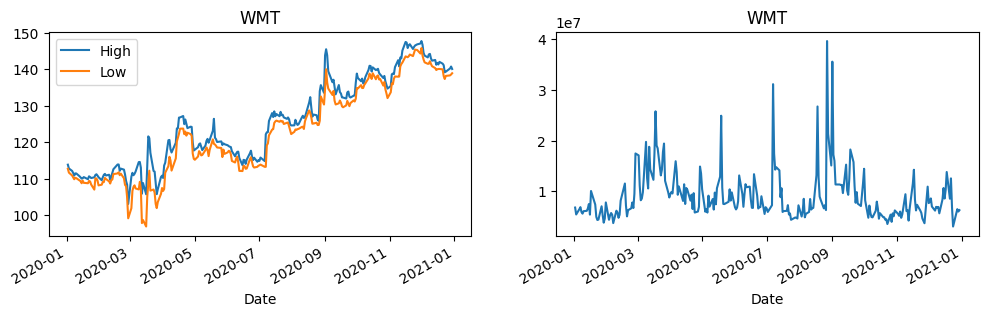

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.head(3))

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12, 3))
    df[['High','Low']].plot(title=ticker, ax=ax0) # dataframe
    df.Volume.plot(title=ticker, ax=ax1) # series
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - title***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


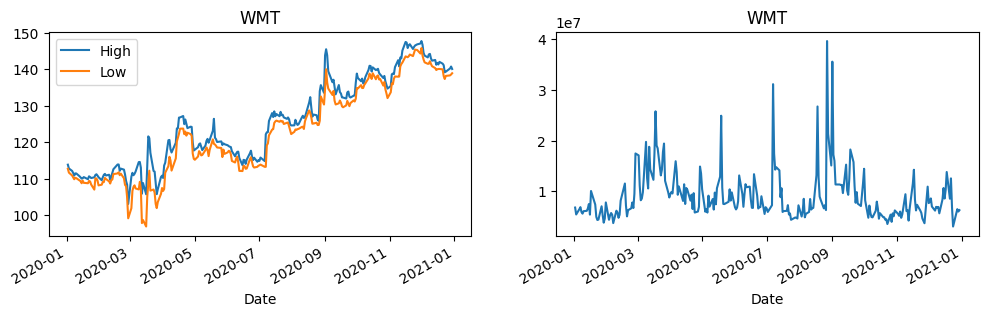

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.head(3))

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12, 3))
    df[['High','Low']].plot(title=ticker, ax=ax0) # dataframe
    df.Volume.plot(title=ticker, ax=ax1) # series
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - subplots***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


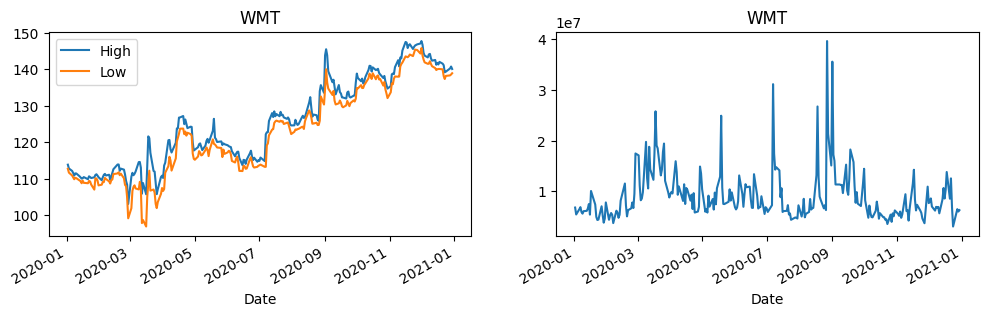

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.head(3))

    fig, ax = plt.subplots(figsize=(12, 3))
    df[['High','Low']].plot(title=ticker, ax=ax, subplots=True)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - sharex***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


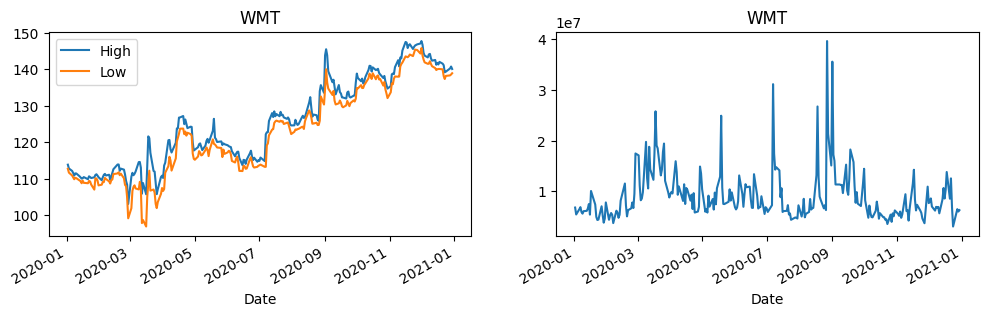

In [ ]:
def main():
    ticker = 'WMT'
    start = '2020-01-01'
    end = '2020-12-31'
    df = yf.Ticker(ticker).history(start=start, end=end)
    print(df.head(3))

    fig, ax = plt.subplots(figsize=(12, 3))
    df[['High','Low']].plot(title=ticker, ax=ax, subplots=True, sharex=True)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - x***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


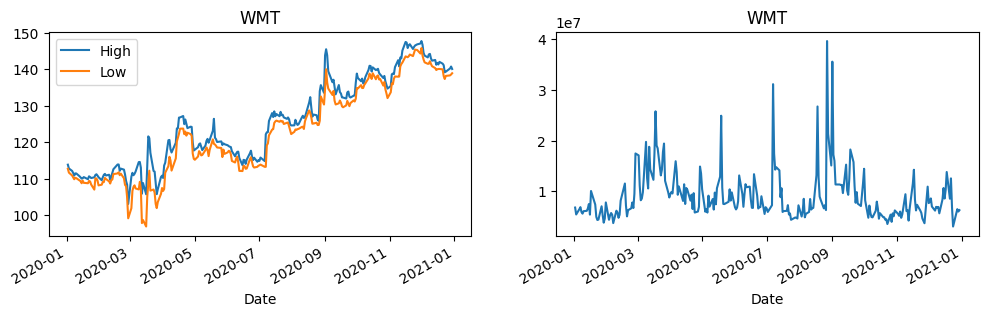

In [ ]:
def main():
    ticker = 'AAPL'
    company = yf.Ticker(ticker)
    maturities = company.options
    maturity = maturities[0] 
    print(maturities,end="\n\n")

    options = company.option_chain(maturity)
    calls = options.calls
    print(calls.head(3),end="\n\n")

    fig, ax = plt.subplots(figsize=(12, 3))
    calls.plot(x='strike', y='lastPrice', label=f'{ticker} Call {maturity}', ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - y***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


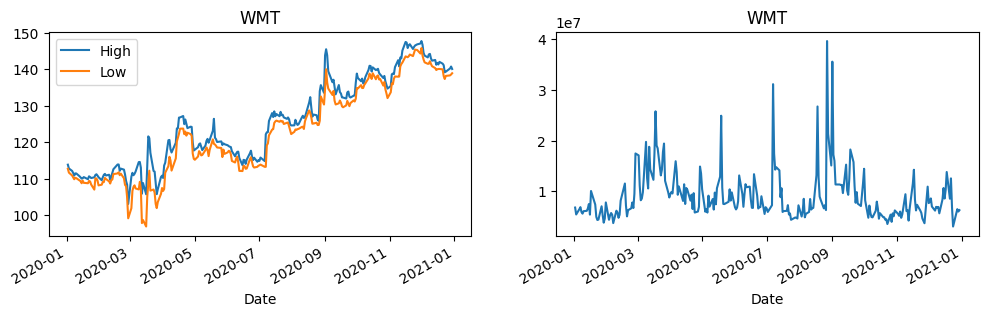

In [ ]:
def main():
    ticker = 'AAPL'
    company = yf.Ticker(ticker)
    maturities = company.options
    maturity = maturities[0] 
    print(maturities,end="\n\n")

    options = company.option_chain(maturity)
    calls = options.calls
    print(calls.head(3),end="\n\n")

    fig, ax = plt.subplots(figsize=(12, 3))
    calls.plot(x='strike', y='lastPrice', label=f'{ticker} Call {maturity}', ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - label***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


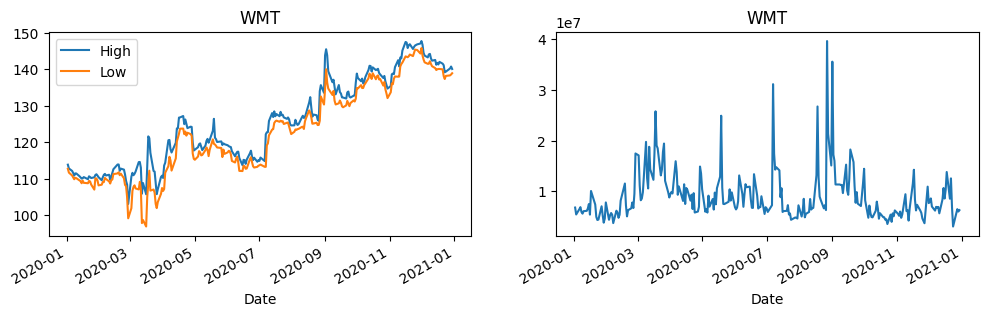

In [ ]:
def main():
    ticker = 'AAPL'
    company = yf.Ticker(ticker)
    maturities = company.options
    maturity = maturities[0] 
    print(maturities,end="\n\n")

    options = company.option_chain(maturity)
    calls = options.calls
    print(calls.head(3),end="\n\n")

    fig, ax = plt.subplots(figsize=(12, 3))
    calls.plot(x='strike', y='lastPrice', label=f'{ticker} Call {maturity}', ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - rot***

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  112.834942  113.812730  112.683049  112.910889   
2020-01-03 00:00:00-05:00  112.274843  112.768488  111.629312  111.914108   
2020-01-06 00:00:00-05:00  111.448952  112.103971  110.850882  111.686279   

                            Volume  Dividends  Stock Splits  
Date                                                         
2020-01-02 00:00:00-05:00  6764900        0.0           0.0  
2020-01-03 00:00:00-05:00  5399200        0.0           0.0  
2020-01-06 00:00:00-05:00  6445500        0.0           0.0  


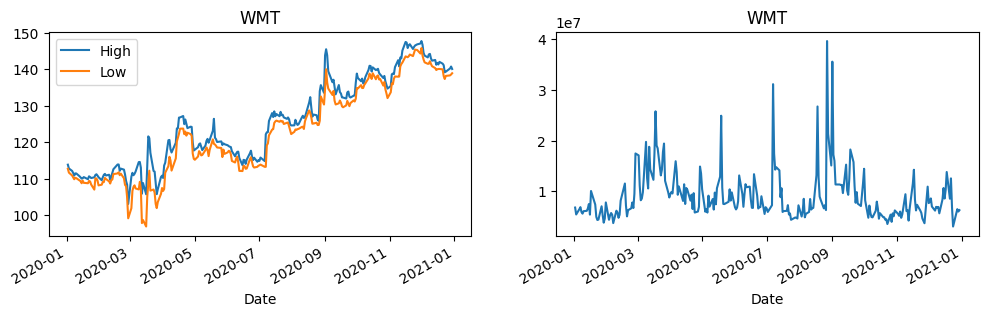

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/theJollySin/scipy_con_2019/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/StateSpaceModels/global_temps.csv'
    df = pd.read_csv(url)
    print(df.head())

    df = df.pivot(index='Date', columns='Source', values='Mean')
    print(df.head())

    df.GCAG.plot(rot=30)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - kind='box'***

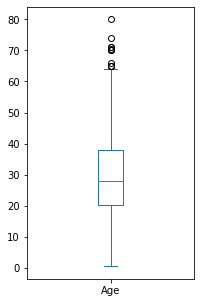

In [ ]:
def main():
    # data
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
    # print(df)

    # box plot
    fig, ax = plt.subplots(figsize=(3,5))
    df.Age.plot(kind='box',ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - kind='hist'***

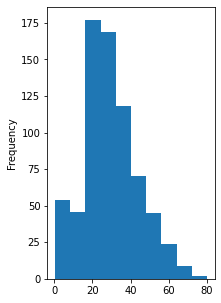

In [ ]:
def main():
    # data
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url, index_col='PassengerId') # pandas dataframe
    # print(df)

    # histogram
    fig, ax = plt.subplots(figsize=(3,5))
    df.Age.plot(kind='hist',ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - kind='density'***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
    names = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
    df = pd.read_csv(url, names=names, header=0)
    print(df.head(3))

    fig, ax = plt.subplots(figsize=(12, 3))
    df.beer.plot(kind='hist', bins=10, title='Histogram of Beer Servings', density=True, ax=ax)
    df.beer.plot(kind='density', xlim=(0, 400), ax=ax)
    ax.set_xlabel('Beer Servings')
    ax.set_ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - kind='scatter'***

In [ ]:
def main():
    df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
    print(df.head())

    fig, ax = plt.subplots()
    if 0:
        ax.scatter(df.wt, df.mpg);
    elif 0:
        df.plot(x='wt', y='mpg', kind='scatter', ax=ax);
    elif 1:
        df.plot(x='wt', y='mpg', kind='scatter', ax=ax, s=df.hp, c='disp', colormap='Blues', alpha=0.5)
    plt.show()

if __name__ == "__main__":
    main()

#####***Keyword - kind='bar'***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
    names = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
    df = pd.read_csv(url, names=names, header=0)
    print(df.head())

    fig, ax = plt.subplots(figsize=(12, 3))
    df.continent.value_counts().plot(kind='bar', ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

####***Section 2 Method - hist***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
    names = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
    df = pd.read_csv(url, names=names, header=0)
    print(df.head())

    fig, ax = plt.subplots(figsize=(12, 3))
    df.hist(column='beer', by='continent', ax=ax, sharex=True, sharey=True, layout=(2, 3))
    plt.show()

if __name__ == "__main__":
    main()

####***Section 3 Method - boxplot***

       country  beer  spirit  wine  liters continent
0  Afghanistan     0       0     0     0.0        AS
1      Albania    89     132    54     4.9        EU
2      Algeria    25       0    14     0.7        AF
3      Andorra   245     138   312    12.4        EU
4       Angola   217      57    45     5.9        AF


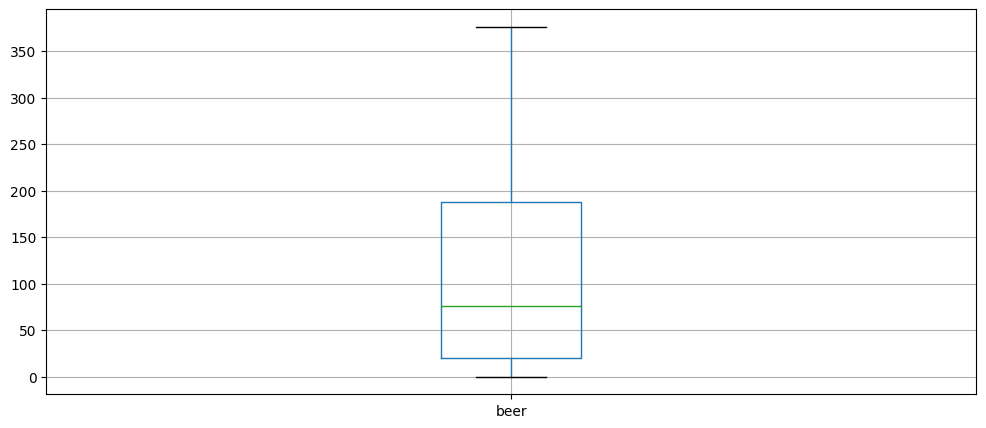

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
    names = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
    df = pd.read_csv(url, names=names, header=0)
    print(df.head())

    fig, ax = plt.subplots(figsize=(12, 5))
    df.boxplot(column='beer', ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

####***Section 4 Function - pd.plotting.scatter_matrix***

In [ ]:
def main():
    url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
    names = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
    df = pd.read_csv(url, names=names, header=0)
    print(df.head())

    fig, ax = plt.subplots(figsize=(12, 5))
    pd.plotting.scatter_matrix(df[['beer', 'spirit', 'wine']], ax=ax)
    plt.show()

if __name__ == "__main__":
    main()

#***Reference***

### [Avoid These 25 Nooby Pandas Coding Mistakes](https://www.youtube.com/watch?v=_gaAoJBMJ_Q)